<a href="https://colab.research.google.com/github/shreya1110-dev/MTechCodeFiles/blob/main/Assignments/Sem1/Machine%20Learning%20/Assignment-1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bike_test.csv to bike_test.csv
Saving bike_train.csv to bike_train.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, make_scorer

In [3]:
train_df = pd.read_csv("bike_train.csv")
test_df = pd.read_csv("bike_test.csv")

In [4]:
train_df.head()

datetime  season  holiday  workingday  weather      temp  \
0   2012-07-15 7:00:00       3        0           0        1  28.70000   
1  2012-08-14 15:00:00       3        0           1        1  33.62000   
2   2011-02-06 6:00:00       1        0           0        1  10.66000   
3  2012-05-06 17:00:02       2        0           0        2  26.42506   
4   2012-01-09 2:00:00       1        0           1        1   9.84000   

       atemp  humidity  windspeed  casual  registered  count  
0  33.335000        79   6.003200      17          30     47  
1  37.880000        46  15.001300      84         199    283  
2  12.880000        60  15.001300       0           1      1  
3  30.566166        61   9.512288     198         330    531  
4  12.120000        56   8.998100       2           3      5

## Q1. Examine dataset size, missing values, and feature types

In [5]:
print("Size of dataset", train_df.shape)

Size of dataset (10450, 12)


In [6]:
train_df.isnull().values.any()   # no missing data

np.False_

In [7]:
train_df.dtypes  # feature types

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
train_df.head()

datetime  season  holiday  workingday  weather      temp  \
0   2012-07-15 7:00:00       3        0           0        1  28.70000   
1  2012-08-14 15:00:00       3        0           1        1  33.62000   
2   2011-02-06 6:00:00       1        0           0        1  10.66000   
3  2012-05-06 17:00:02       2        0           0        2  26.42506   
4   2012-01-09 2:00:00       1        0           1        1   9.84000   

       atemp  humidity  windspeed  casual  registered  count  
0  33.335000        79   6.003200      17          30     47  
1  37.880000        46  15.001300      84         199    283  
2  12.880000        60  15.001300       0           1      1  
3  30.566166        61   9.512288     198         330    531  
4  12.120000        56   8.998100       2           3      5

## Q2. Visualize relationships between key features and the target variable (count).

Statistical analysis

In [9]:
train_df.describe()

season       holiday    workingday       weather          temp  \
count  10450.000000  10450.000000  10450.000000  10450.000000  10450.000000   
mean       2.507943      0.028804      0.675694      1.413876     20.191700   
std        1.116946      0.167263      0.468137      0.632258      7.792683   
min        1.000000      0.000000      0.000000      1.000000      0.820000   
25%        2.000000      0.000000      0.000000      1.000000     13.940000   
50%        3.000000      0.000000      1.000000      1.000000     20.500000   
75%        4.000000      0.000000      1.000000      2.000000     26.240000   
max        4.000000      1.000000      1.000000      4.000000     41.000000   

              atemp      humidity     windspeed        casual    registered  \
count  10450.000000  10450.000000  10450.000000  10450.000000  10450.000000   
mean      23.605793     61.924211     12.765259     35.869091    154.511675   
std        8.478045     19.245193      8.102821     49.629436    150.861267   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     35.000000   
50%       24.240000     62.000000     12.450050     16.000000    117.000000   
75%       31.060000     77.000000     16.997900     49.000000    221.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10450.000000  
mean     190.410526  
std      181.038755  
min        1.000000  
25%       42.000000  
50%      143.000000  
75%      283.000000  
max      977.000000

Data distribution

In [10]:
def plot_distribution(df):
  plt.figure(figsize=(40, 40))

  numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
  for i, col in enumerate(numerical_columns):
      plt.subplot(10, 3, i + 1) # Adjust subplot grid based on number of features
      sns.histplot(df[col], kde=True)
      plt.title(f'Distribution of {col}')
      plt.tight_layout()
  plt.show()

Data visualization

In [11]:
def visualize_relationships(df):

  features = df.select_dtypes(include=['int', 'float']).columns.tolist()
  num_features = len(features)
  plt.figure(figsize=(30, 40))

  for i in range(num_features):
    plt.subplot(10, 5, i+1)
    sns.scatterplot(x=df[features[i]], y=df['count'])
    plt.title(f'Scatter Plot of feature {features[i]} vs target')
    plt.xlabel(features[i])
    plt.ylabel('Target')

  plt.tight_layout()
  plt.show()


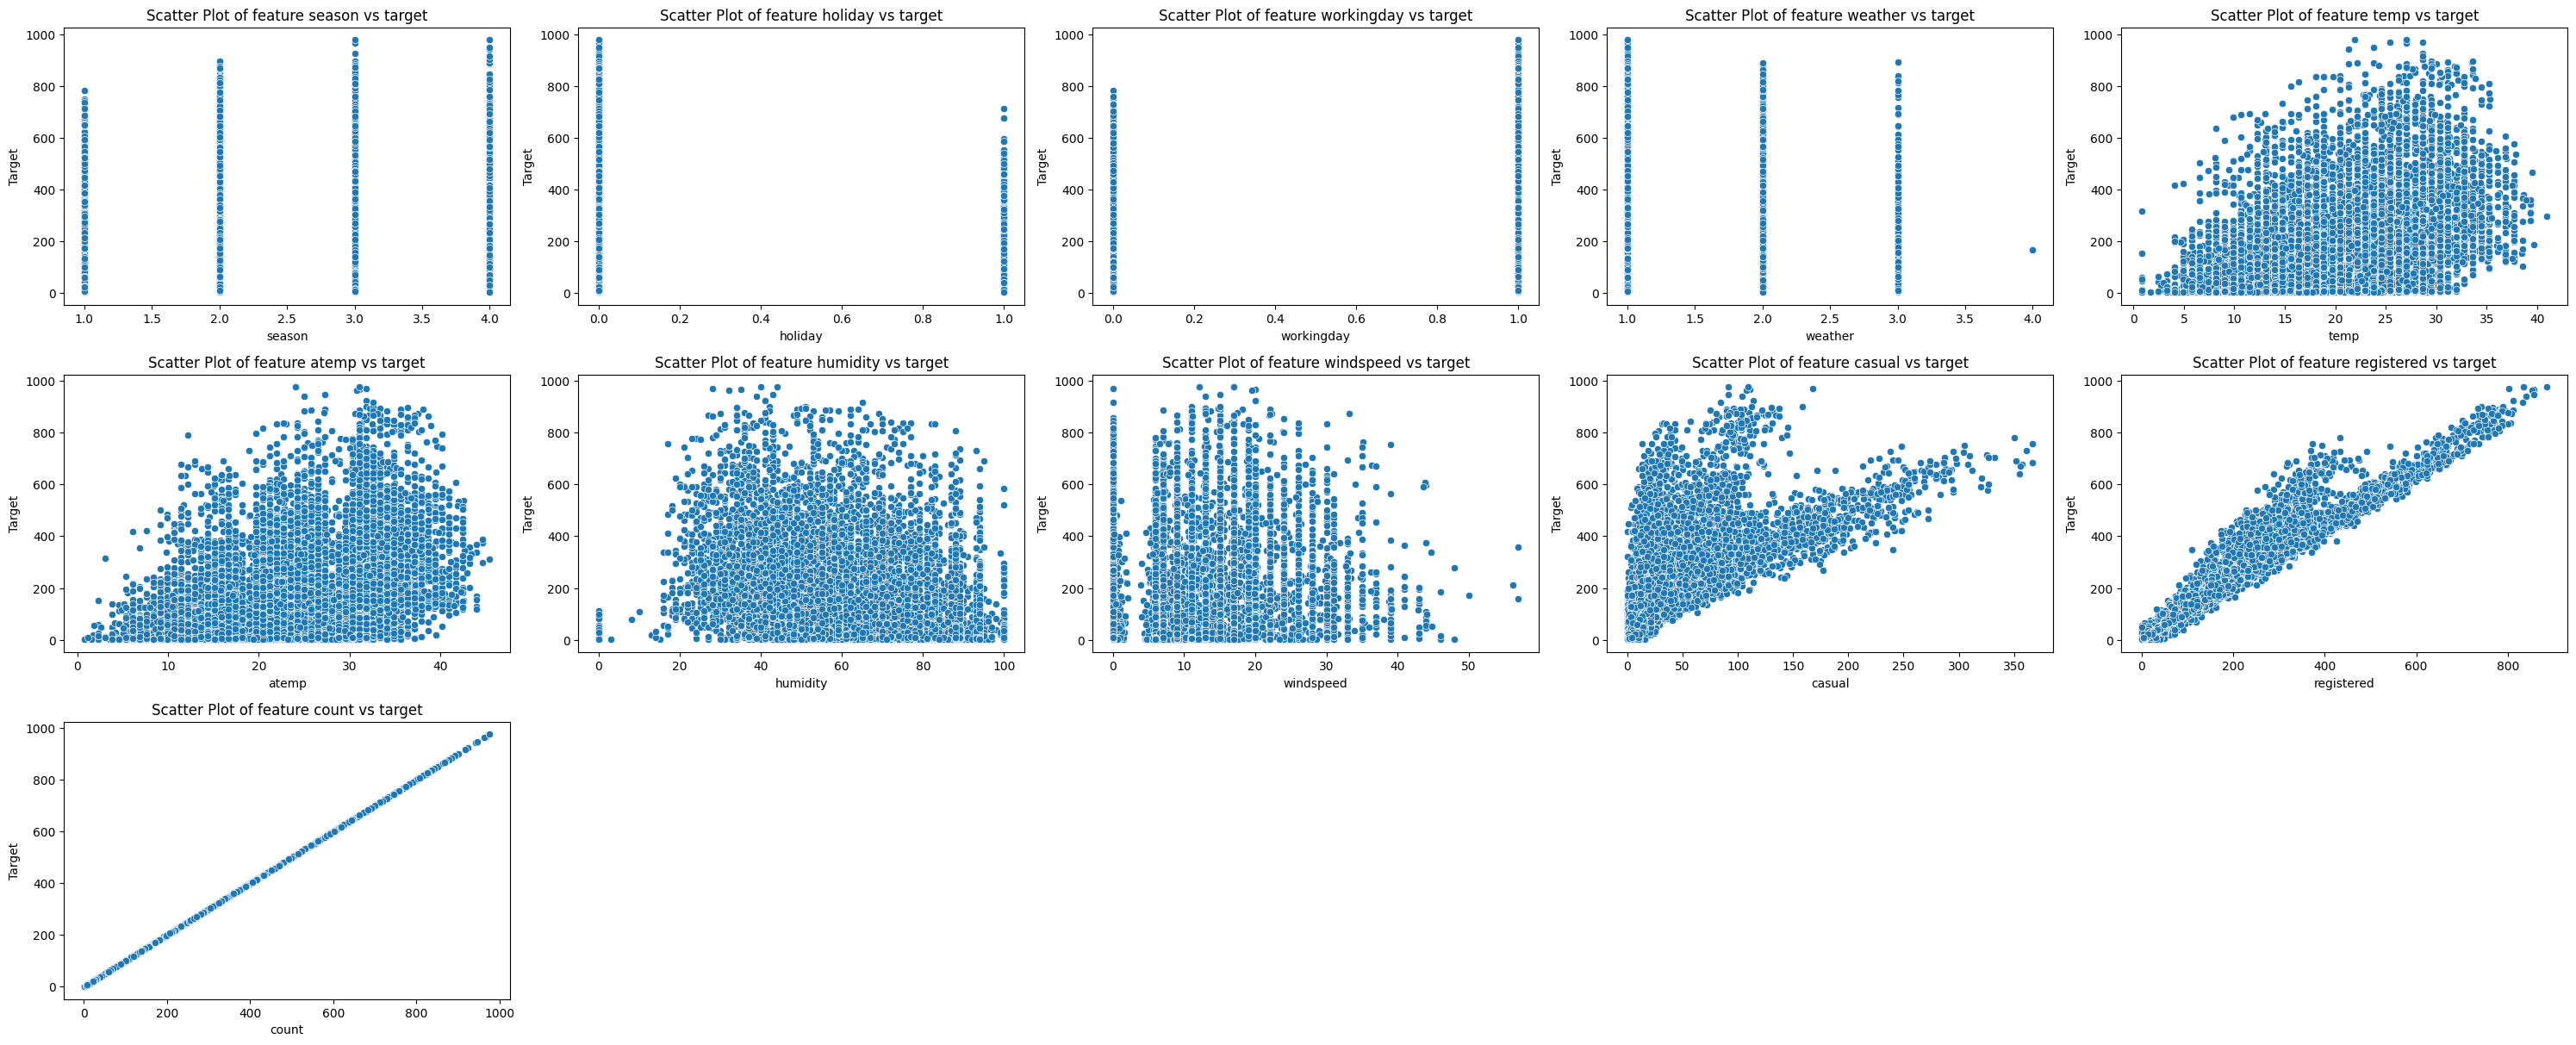

In [12]:
visualize_relationships(train_df)

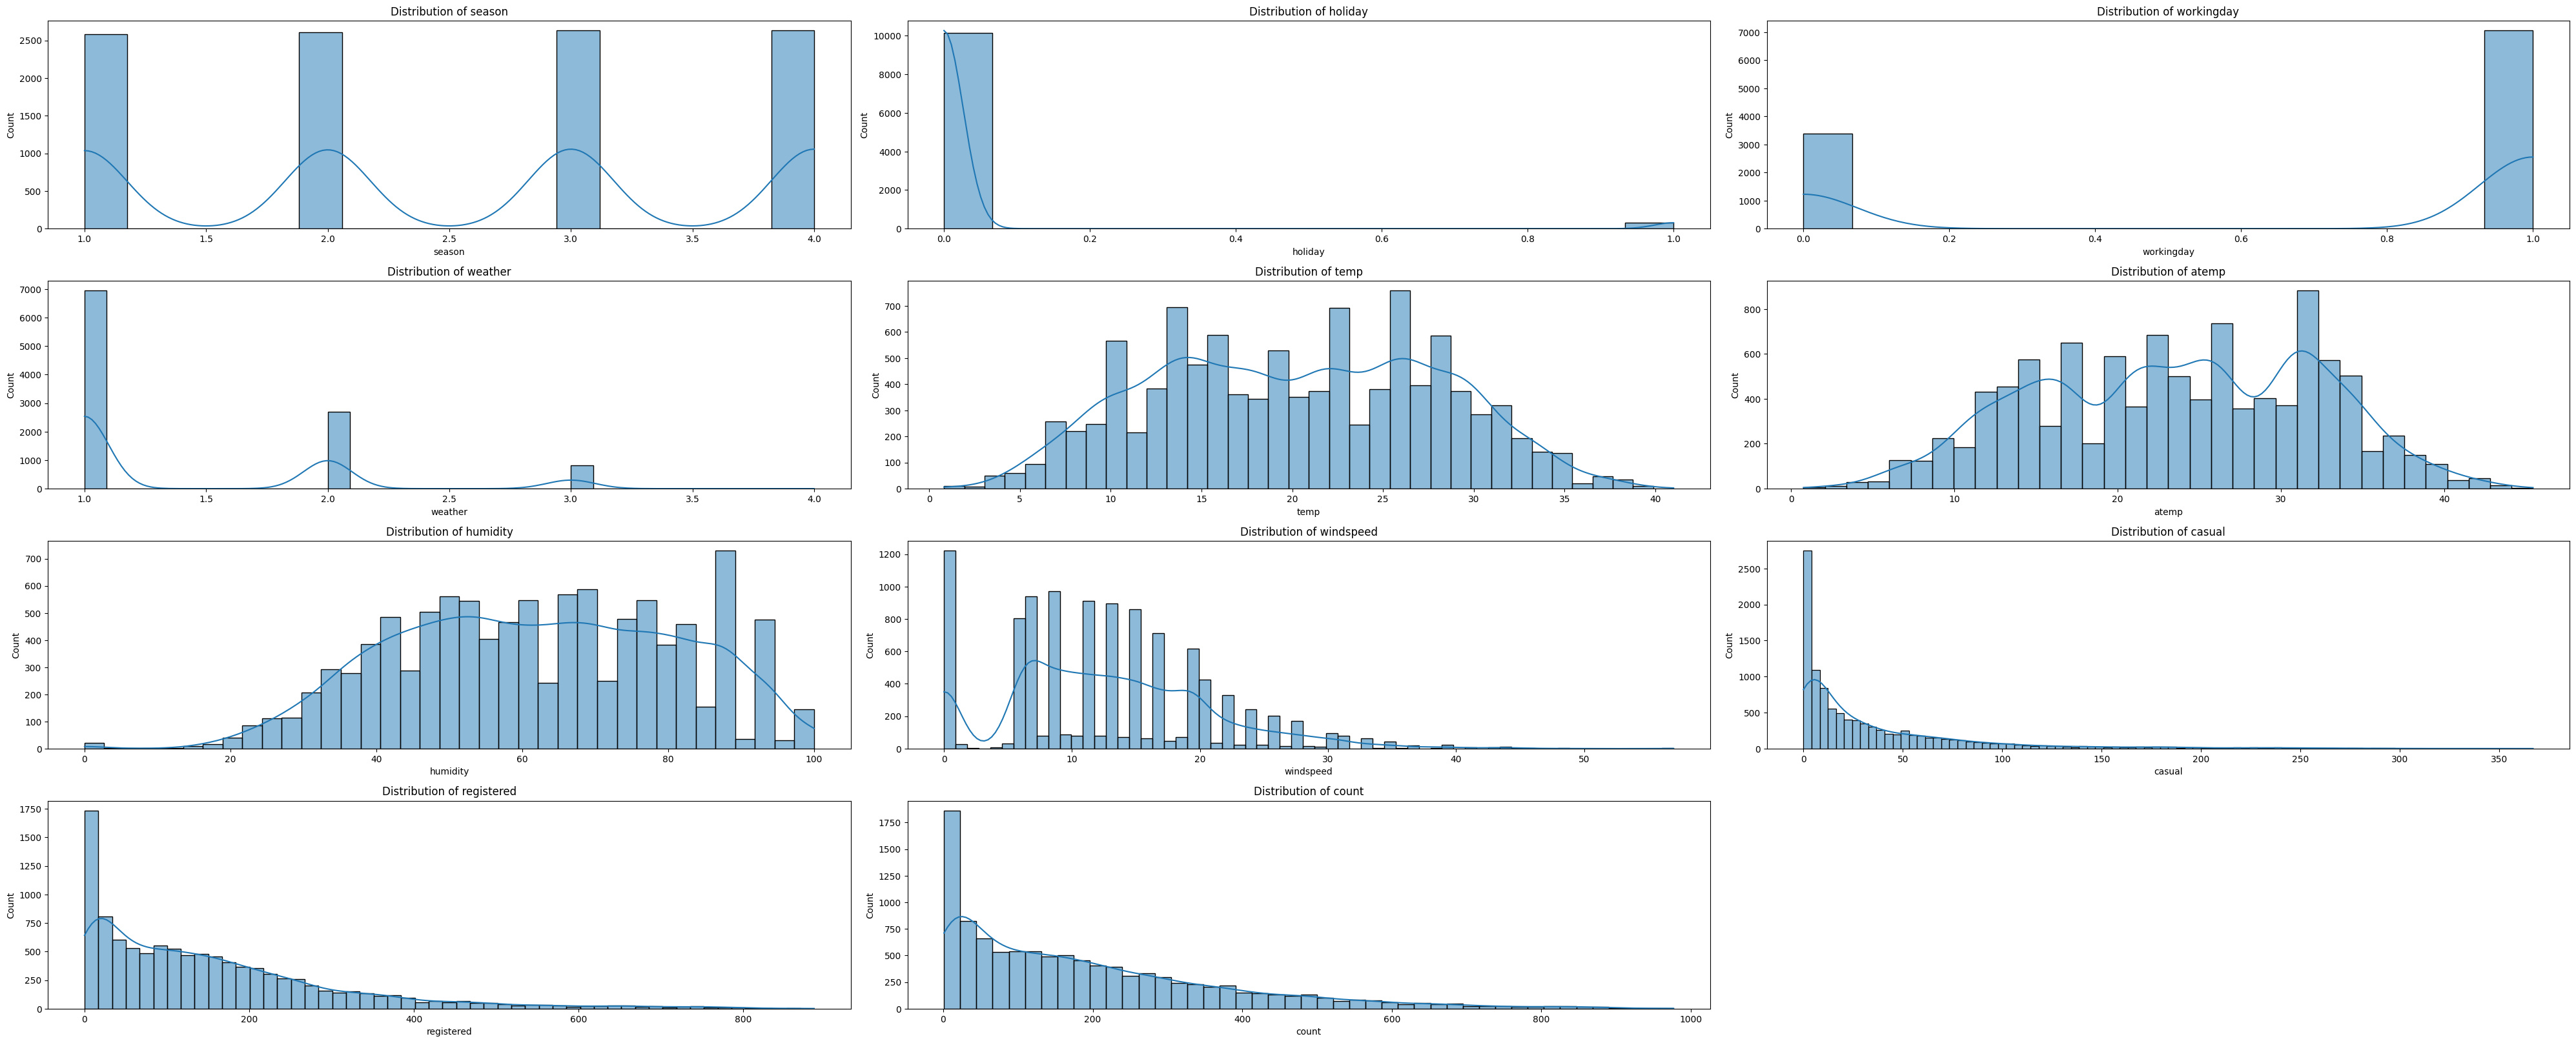

In [13]:
plot_distribution(train_df)

## Q3. Suggest which variables are likely to be most informative.

In [14]:
def correlation_matrix(df):
  correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

  # You can then use a heatmap to visualize all correlations at once
  plt.figure(figsize=(20, 10))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.show()

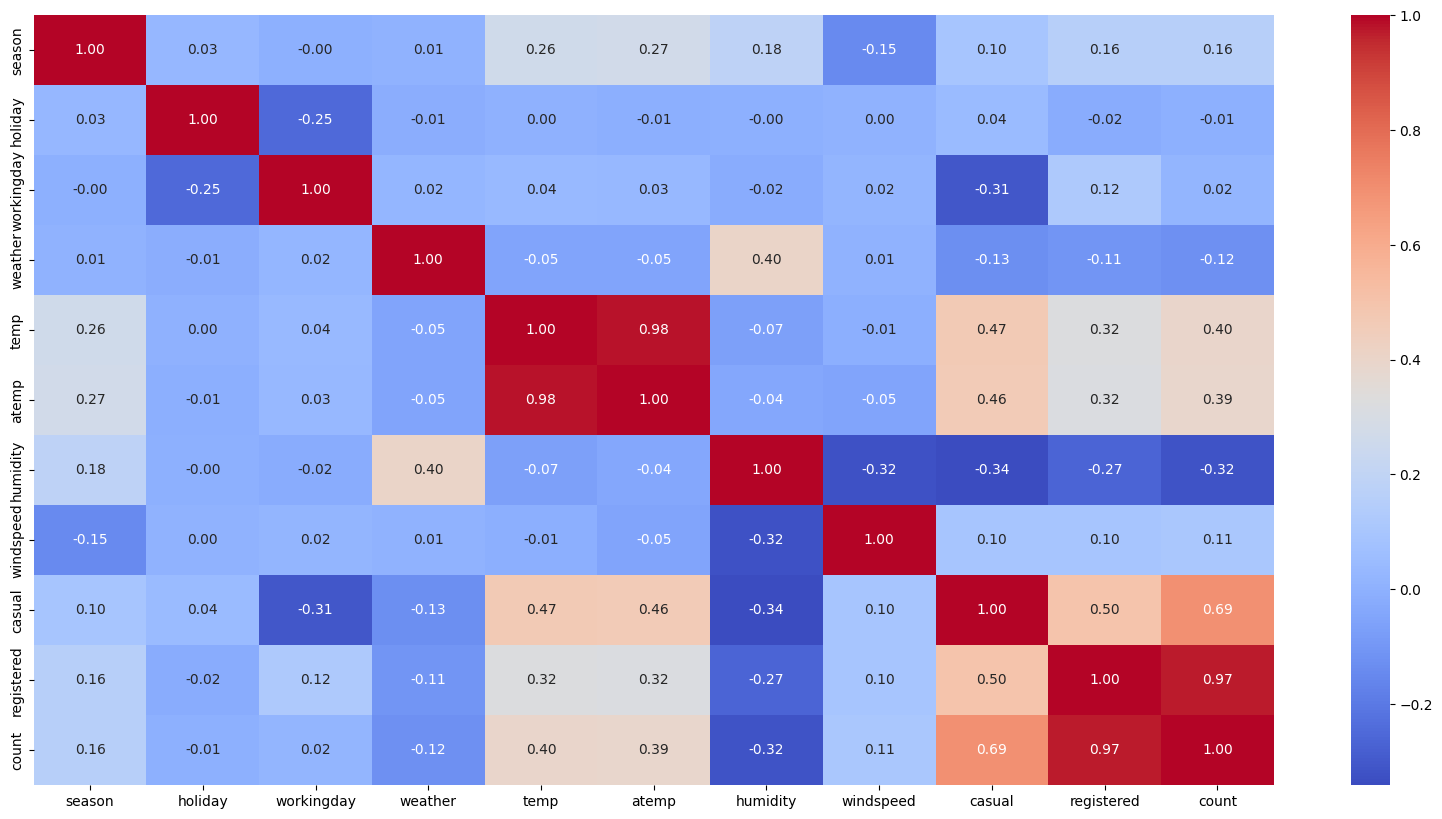

In [15]:
correlation_matrix(train_df)

###### Numerical - "temp", "atemp" and "humidity" show good correlation with target variable. "casual" and "registered" are excluded as thet are components of "count"
###### Categorical - "season", "weather", "holiday", "workingday" are also important

### Q4. You can try to derive features from datetime (hour, weekday, month, season), encode categorical variables, consider transformations to capture nonlinear trends to improve your model performance. If you do any of these, report it as answer to Q4. It is optional.

In [16]:
data_before_preprocessing = train_df.copy()

###### Datetime feature extraction

In [17]:
# splitting by date, month, hour

train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['hour'] = train_df['datetime'].dt.hour
train_df['weekday'] = train_df['datetime'].dt.weekday
train_df['month'] = train_df['datetime'].dt.month

train_df.head()

datetime  season  holiday  workingday  weather      temp  \
0 2012-07-15 07:00:00       3        0           0        1  28.70000   
1 2012-08-14 15:00:00       3        0           1        1  33.62000   
2 2011-02-06 06:00:00       1        0           0        1  10.66000   
3 2012-05-06 17:00:02       2        0           0        2  26.42506   
4 2012-01-09 02:00:00       1        0           1        1   9.84000   

       atemp  humidity  windspeed  casual  registered  count  hour  weekday  \
0  33.335000        79   6.003200      17          30     47     7        6   
1  37.880000        46  15.001300      84         199    283    15        1   
2  12.880000        60  15.001300       0           1      1     6        6   
3  30.566166        61   9.512288     198         330    531    17        6   
4  12.120000        56   8.998100       2           3      5     2        0   

   month  
0      7  
1      8  
2      2  
3      5  
4      1

In [18]:
# since date-time is cyclical from the distribution plot
# ie: 11pm and 12:00am (0:00) is cyclical in nature - so taking sin and cos to explain the cyclical and continuous nature.

for col, max_val in [('hour', 24), ('weekday', 7), ('month', 12)]:
    train_df[f'{col}_sin'] = np.sin(2 * np.pi * train_df[col] / max_val)
    train_df[f'{col}_cos'] = np.cos(2 * np.pi * train_df[col] / max_val)

train_df.head()

datetime  season  holiday  workingday  weather      temp  \
0 2012-07-15 07:00:00       3        0           0        1  28.70000   
1 2012-08-14 15:00:00       3        0           1        1  33.62000   
2 2011-02-06 06:00:00       1        0           0        1  10.66000   
3 2012-05-06 17:00:02       2        0           0        2  26.42506   
4 2012-01-09 02:00:00       1        0           1        1   9.84000   

       atemp  humidity  windspeed  casual  ...  count  hour  weekday  month  \
0  33.335000        79   6.003200      17  ...     47     7        6      7   
1  37.880000        46  15.001300      84  ...    283    15        1      8   
2  12.880000        60  15.001300       0  ...      1     6        6      2   
3  30.566166        61   9.512288     198  ...    531    17        6      5   
4  12.120000        56   8.998100       2  ...      5     2        0      1   

   hour_sin      hour_cos  weekday_sin  weekday_cos  month_sin  month_cos  
0  0.965926 -2.588190e-01    -0.781831      0.62349  -0.500000  -0.866025  
1 -0.707107 -7.071068e-01     0.781831      0.62349  -0.866025  -0.500000  
2  1.000000  6.123234e-17    -0.781831      0.62349   0.866025   0.500000  
3 -0.965926 -2.588190e-01    -0.781831      0.62349   0.500000  -0.866025  
4  0.500000  8.660254e-01     0.000000      1.00000   0.500000   0.866025  

[5 rows x 21 columns]

###### Windspeed has many records with 0 value.
###### Imputing 0 records with median since data is skewed (no need to assume normal distribution).
###### Introducing categorical windspeed_zero to capture if windspeed is 0

In [19]:
train_df['windspeed_zero'] = (train_df['windspeed'] == 0).astype(int)

median_wind = train_df.loc[train_df['windspeed'] != 0, 'windspeed'].median()
train_df.loc[train_df['windspeed'] == 0, 'windspeed'] = median_wind

train_df.head()

datetime  season  holiday  workingday  weather      temp  \
0 2012-07-15 07:00:00       3        0           0        1  28.70000   
1 2012-08-14 15:00:00       3        0           1        1  33.62000   
2 2011-02-06 06:00:00       1        0           0        1  10.66000   
3 2012-05-06 17:00:02       2        0           0        2  26.42506   
4 2012-01-09 02:00:00       1        0           1        1   9.84000   

       atemp  humidity  windspeed  casual  ...  hour  weekday  month  \
0  33.335000        79   6.003200      17  ...     7        6      7   
1  37.880000        46  15.001300      84  ...    15        1      8   
2  12.880000        60  15.001300       0  ...     6        6      2   
3  30.566166        61   9.512288     198  ...    17        6      5   
4  12.120000        56   8.998100       2  ...     2        0      1   

   hour_sin      hour_cos  weekday_sin  weekday_cos  month_sin  month_cos  \
0  0.965926 -2.588190e-01    -0.781831      0.62349  -0.500000  -0.866025   
1 -0.707107 -7.071068e-01     0.781831      0.62349  -0.866025  -0.500000   
2  1.000000  6.123234e-17    -0.781831      0.62349   0.866025   0.500000   
3 -0.965926 -2.588190e-01    -0.781831      0.62349   0.500000  -0.866025   
4  0.500000  8.660254e-01     0.000000      1.00000   0.500000   0.866025   

   windspeed_zero  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 22 columns]

Applying square root transformation on "humidity" since it is right skewed

In [20]:
train_df['sqrt_humidity'] = np.sqrt(train_df['humidity'])
train_df.head()

datetime  season  holiday  workingday  weather      temp  \
0 2012-07-15 07:00:00       3        0           0        1  28.70000   
1 2012-08-14 15:00:00       3        0           1        1  33.62000   
2 2011-02-06 06:00:00       1        0           0        1  10.66000   
3 2012-05-06 17:00:02       2        0           0        2  26.42506   
4 2012-01-09 02:00:00       1        0           1        1   9.84000   

       atemp  humidity  windspeed  casual  ...  weekday  month  hour_sin  \
0  33.335000        79   6.003200      17  ...        6      7  0.965926   
1  37.880000        46  15.001300      84  ...        1      8 -0.707107   
2  12.880000        60  15.001300       0  ...        6      2  1.000000   
3  30.566166        61   9.512288     198  ...        6      5 -0.965926   
4  12.120000        56   8.998100       2  ...        0      1  0.500000   

       hour_cos  weekday_sin  weekday_cos  month_sin  month_cos  \
0 -2.588190e-01    -0.781831      0.62349  -0.500000  -0.866025   
1 -7.071068e-01     0.781831      0.62349  -0.866025  -0.500000   
2  6.123234e-17    -0.781831      0.62349   0.866025   0.500000   
3 -2.588190e-01    -0.781831      0.62349   0.500000  -0.866025   
4  8.660254e-01     0.000000      1.00000   0.500000   0.866025   

   windspeed_zero  sqrt_humidity  
0               0       8.888194  
1               0       6.782330  
2               0       7.745967  
3               0       7.810250  
4               0       7.483315  

[5 rows x 23 columns]

Applying log transform on "temp" and "atemp" to remove outliers and make it symmetric

In [21]:
train_df['log_temp'] = np.log1p(train_df['temp'] - train_df['temp'].min() + 1) # avoid negative values
train_df['log_atemp'] = np.log1p(train_df['atemp'] - train_df['atemp'].min() + 1)
train_df.head()

datetime  season  holiday  workingday  weather      temp  \
0 2012-07-15 07:00:00       3        0           0        1  28.70000   
1 2012-08-14 15:00:00       3        0           1        1  33.62000   
2 2011-02-06 06:00:00       1        0           0        1  10.66000   
3 2012-05-06 17:00:02       2        0           0        2  26.42506   
4 2012-01-09 02:00:00       1        0           1        1   9.84000   

       atemp  humidity  windspeed  casual  ...  hour_sin      hour_cos  \
0  33.335000        79   6.003200      17  ...  0.965926 -2.588190e-01   
1  37.880000        46  15.001300      84  ... -0.707107 -7.071068e-01   
2  12.880000        60  15.001300       0  ...  1.000000  6.123234e-17   
3  30.566166        61   9.512288     198  ... -0.965926 -2.588190e-01   
4  12.120000        56   8.998100       2  ...  0.500000  8.660254e-01   

   weekday_sin  weekday_cos  month_sin  month_cos  windspeed_zero  \
0    -0.781831      0.62349  -0.500000  -0.866025               0   
1     0.781831      0.62349  -0.866025  -0.500000               0   
2    -0.781831      0.62349   0.866025   0.500000               0   
3    -0.781831      0.62349   0.500000  -0.866025               0   
4     0.000000      1.00000   0.500000   0.866025               0   

   sqrt_humidity  log_temp  log_atemp  
0       8.888194  3.397189   3.543131  
1       6.782330  3.549617   3.666634  
2       7.745967  2.471484   2.647592  
3       7.810250  3.317999   3.459660  
4       7.483315  2.399712   2.592265  

[5 rows x 25 columns]

Visualizing target variable

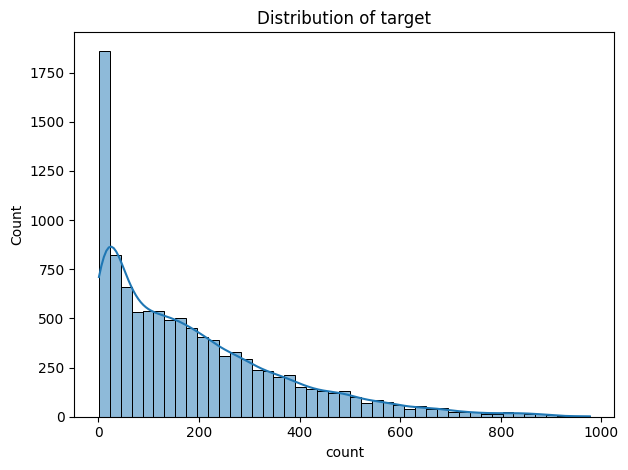

In [22]:
sns.histplot(train_df['count'], kde=True)
plt.title(f'Distribution of target')
plt.tight_layout()
plt.show()

In [23]:
print("Dataset size before outlier removal", train_df.shape)
Q1 = train_df['count'].quantile(0.25)
Q3 = train_df['count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_df = train_df[(train_df['count'] >= lower_bound) & (train_df['count'] <= upper_bound)].copy()
print("Dataset size after outlier removal", train_df.shape)

Dataset size before outlier removal (10450, 25)
Dataset size after outlier removal (10158, 25)


Since target variable is left skewed and has lot of 0 records, performing log transformation

In [24]:
train_df['log_count'] = np.log1p(train_df['count'])
train_df.head()

datetime  season  holiday  workingday  weather      temp  \
0 2012-07-15 07:00:00       3        0           0        1  28.70000   
1 2012-08-14 15:00:00       3        0           1        1  33.62000   
2 2011-02-06 06:00:00       1        0           0        1  10.66000   
3 2012-05-06 17:00:02       2        0           0        2  26.42506   
4 2012-01-09 02:00:00       1        0           1        1   9.84000   

       atemp  humidity  windspeed  casual  ...      hour_cos  weekday_sin  \
0  33.335000        79   6.003200      17  ... -2.588190e-01    -0.781831   
1  37.880000        46  15.001300      84  ... -7.071068e-01     0.781831   
2  12.880000        60  15.001300       0  ...  6.123234e-17    -0.781831   
3  30.566166        61   9.512288     198  ... -2.588190e-01    -0.781831   
4  12.120000        56   8.998100       2  ...  8.660254e-01     0.000000   

   weekday_cos  month_sin  month_cos  windspeed_zero  sqrt_humidity  log_temp  \
0      0.62349  -0.500000  -0.866025               0       8.888194  3.397189   
1      0.62349  -0.866025  -0.500000               0       6.782330  3.549617   
2      0.62349   0.866025   0.500000               0       7.745967  2.471484   
3      0.62349   0.500000  -0.866025               0       7.810250  3.317999   
4      1.00000   0.500000   0.866025               0       7.483315  2.399712   

   log_atemp  log_count  
0   3.543131   3.871201  
1   3.666634   5.648974  
2   2.647592   0.693147  
3   3.459660   6.276643  
4   2.592265   1.791759  

[5 rows x 26 columns]

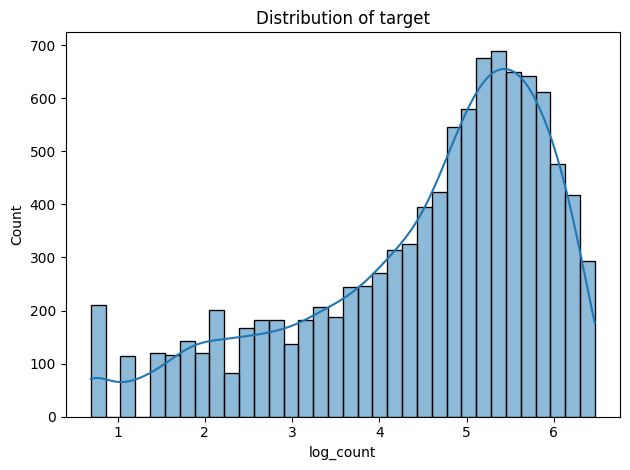

In [25]:
sns.histplot(train_df['log_count'], kde=True)
plt.title(f'Distribution of target')
plt.tight_layout()
plt.show()

###### Categorical variable transformation

In [26]:
# perform one-hot encoding
season_dummies = pd.get_dummies(train_df['season'], prefix='season', drop_first=True)
weather_dummies = pd.get_dummies(train_df['weather'], prefix='weather', drop_first=True)

Useful features extraction - based on real life knowledge

In [27]:
# perform binning to group hours into categories to capture periodic patterns

bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']

train_df['hour_bin'] = pd.cut(train_df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)
hour_bin_dummies = pd.get_dummies(train_df['hour_bin'], prefix='hour_bin')

In [28]:
train_df['hour_workingday'] = train_df['hour'] * train_df['workingday'] # weekend hours are likely to have more bike rentals.
train_df.head()

datetime  season  holiday  workingday  weather      temp  \
0 2012-07-15 07:00:00       3        0           0        1  28.70000   
1 2012-08-14 15:00:00       3        0           1        1  33.62000   
2 2011-02-06 06:00:00       1        0           0        1  10.66000   
3 2012-05-06 17:00:02       2        0           0        2  26.42506   
4 2012-01-09 02:00:00       1        0           1        1   9.84000   

       atemp  humidity  windspeed  casual  ...  weekday_cos  month_sin  \
0  33.335000        79   6.003200      17  ...      0.62349  -0.500000   
1  37.880000        46  15.001300      84  ...      0.62349  -0.866025   
2  12.880000        60  15.001300       0  ...      0.62349   0.866025   
3  30.566166        61   9.512288     198  ...      0.62349   0.500000   
4  12.120000        56   8.998100       2  ...      1.00000   0.500000   

   month_cos  windspeed_zero  sqrt_humidity  log_temp  log_atemp  log_count  \
0  -0.866025               0       8.888194  3.397189   3.543131   3.871201   
1  -0.500000               0       6.782330  3.549617   3.666634   5.648974   
2   0.500000               0       7.745967  2.471484   2.647592   0.693147   
3  -0.866025               0       7.810250  3.317999   3.459660   6.276643   
4   0.866025               0       7.483315  2.399712   2.592265   1.791759   

    hour_bin  hour_workingday  
0    morning                0  
1  afternoon               15  
2    morning                0  
3  afternoon                0  
4      night                2  

[5 rows x 28 columns]

Feature and target set after pre processing

In [29]:
features = pd.concat([
    train_df[['holiday', 'workingday', 'log_temp', 'atemp', 'sqrt_humidity', 'windspeed',
        'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos',
        'month_sin', 'month_cos', 'hour_workingday', 'windspeed_zero', 'log_atemp']],
    season_dummies,
    weather_dummies,
    hour_bin_dummies
], axis=1)
features.head()

holiday  workingday  log_temp      atemp  sqrt_humidity  windspeed  \
0        0           0  3.397189  33.335000       8.888194   6.003200   
1        0           1  3.549617  37.880000       6.782330  15.001300   
2        0           0  2.471484  12.880000       7.745967  15.001300   
3        0           0  3.317999  30.566166       7.810250   9.512288   
4        0           1  2.399712  12.120000       7.483315   8.998100   

   hour_sin      hour_cos  weekday_sin  weekday_cos  ...  season_2  season_3  \
0  0.965926 -2.588190e-01    -0.781831      0.62349  ...     False      True   
1 -0.707107 -7.071068e-01     0.781831      0.62349  ...     False      True   
2  1.000000  6.123234e-17    -0.781831      0.62349  ...     False     False   
3 -0.965926 -2.588190e-01    -0.781831      0.62349  ...      True     False   
4  0.500000  8.660254e-01     0.000000      1.00000  ...     False     False   

   season_4  weather_2  weather_3  weather_4  hour_bin_night  \
0     False      False      False      False           False   
1     False      False      False      False           False   
2     False      False      False      False           False   
3     False       True      False      False           False   
4     False      False      False      False            True   

   hour_bin_morning  hour_bin_afternoon  hour_bin_evening  
0              True               False             False  
1             False                True             False  
2              True               False             False  
3             False                True             False  
4             False               False             False  

[5 rows x 25 columns]

In [30]:
features.columns

Index(['holiday', 'workingday', 'log_temp', 'atemp', 'sqrt_humidity',
       'windspeed', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos',
       'month_sin', 'month_cos', 'hour_workingday', 'windspeed_zero',
       'log_atemp', 'season_2', 'season_3', 'season_4', 'weather_2',
       'weather_3', 'weather_4', 'hour_bin_night', 'hour_bin_morning',
       'hour_bin_afternoon', 'hour_bin_evening'],
      dtype='object')

In [31]:
target = train_df['log_count']
target

0        3.871201
1        5.648974
2        0.693147
3        6.276643
4        1.791759
           ...   
10445    6.429719
10446    4.158883
10447    4.174387
10448    5.602119
10449    4.094345
Name: log_count, Length: 10158, dtype: float64

Visualizing data after transformations

In [32]:
features_visualize = pd.concat([features, train_df['count']], axis=1)
features_visualize.head()

holiday  workingday  log_temp      atemp  sqrt_humidity  windspeed  \
0        0           0  3.397189  33.335000       8.888194   6.003200   
1        0           1  3.549617  37.880000       6.782330  15.001300   
2        0           0  2.471484  12.880000       7.745967  15.001300   
3        0           0  3.317999  30.566166       7.810250   9.512288   
4        0           1  2.399712  12.120000       7.483315   8.998100   

   hour_sin      hour_cos  weekday_sin  weekday_cos  ...  season_3  season_4  \
0  0.965926 -2.588190e-01    -0.781831      0.62349  ...      True     False   
1 -0.707107 -7.071068e-01     0.781831      0.62349  ...      True     False   
2  1.000000  6.123234e-17    -0.781831      0.62349  ...     False     False   
3 -0.965926 -2.588190e-01    -0.781831      0.62349  ...     False     False   
4  0.500000  8.660254e-01     0.000000      1.00000  ...     False     False   

   weather_2  weather_3  weather_4  hour_bin_night  hour_bin_morning  \
0      False      False      False           False              True   
1      False      False      False           False             False   
2      False      False      False           False              True   
3       True      False      False           False             False   
4      False      False      False            True             False   

   hour_bin_afternoon  hour_bin_evening  count  
0               False             False     47  
1                True             False    283  
2               False             False      1  
3                True             False    531  
4               False             False      5  

[5 rows x 26 columns]

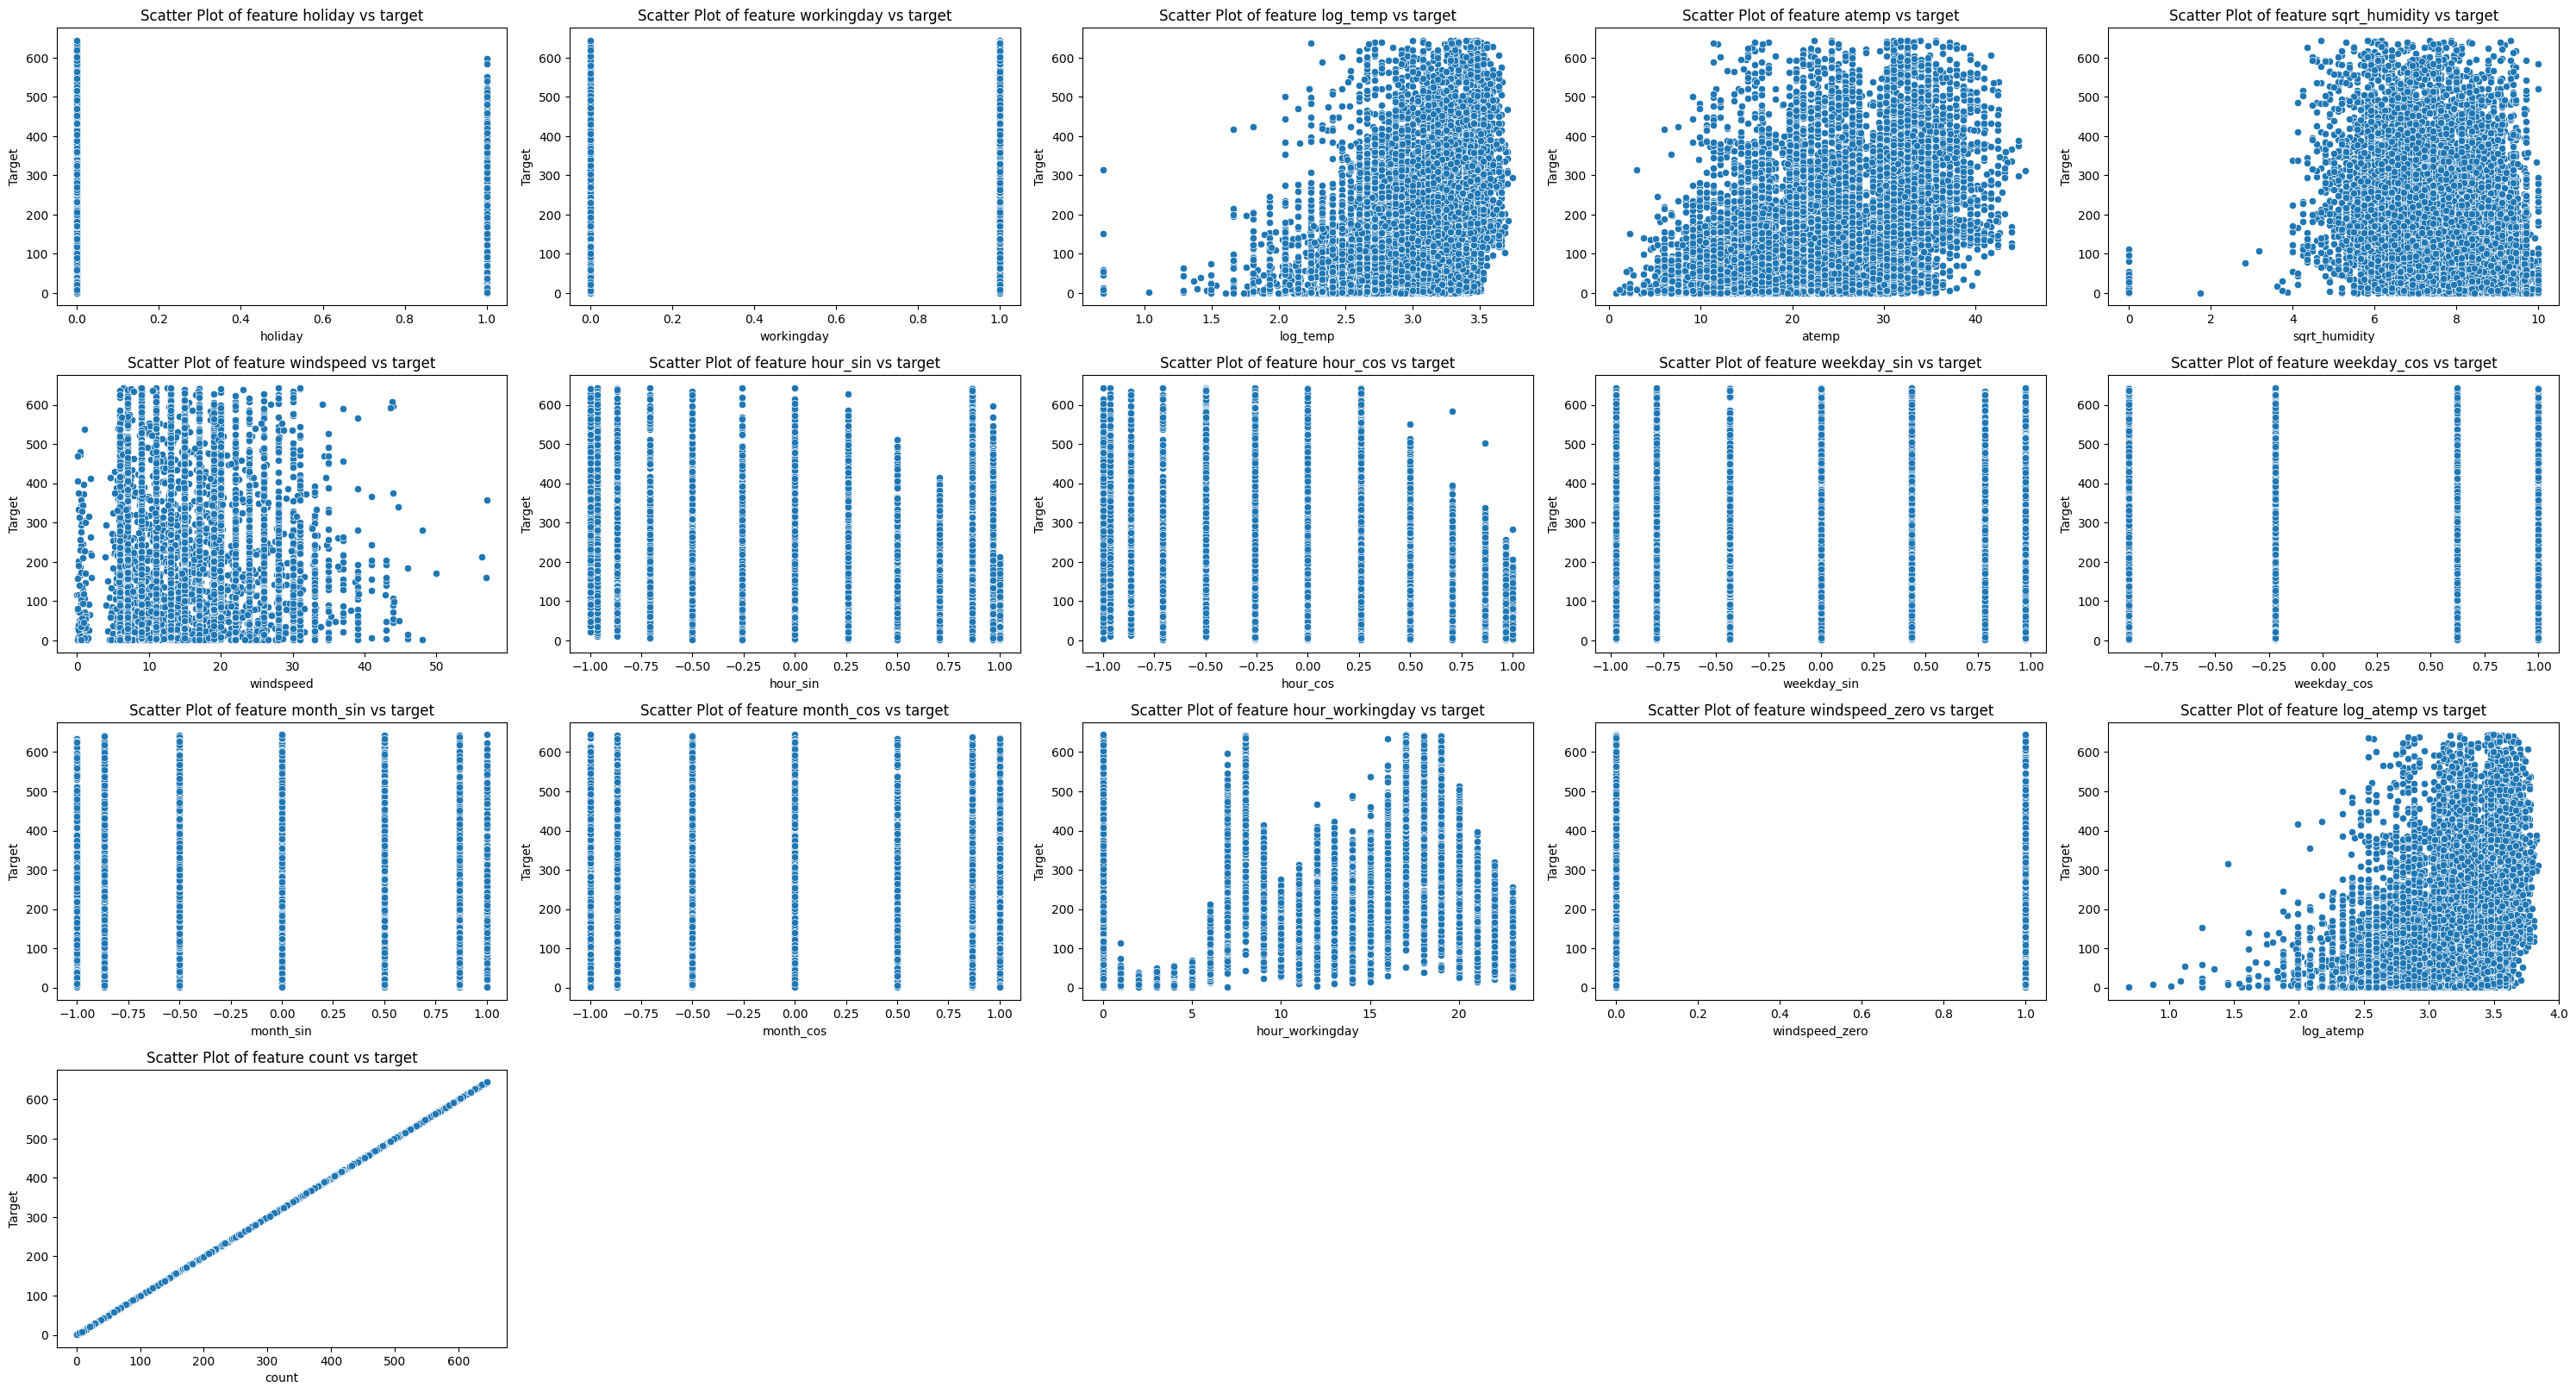

In [33]:
visualize_relationships(features_visualize)

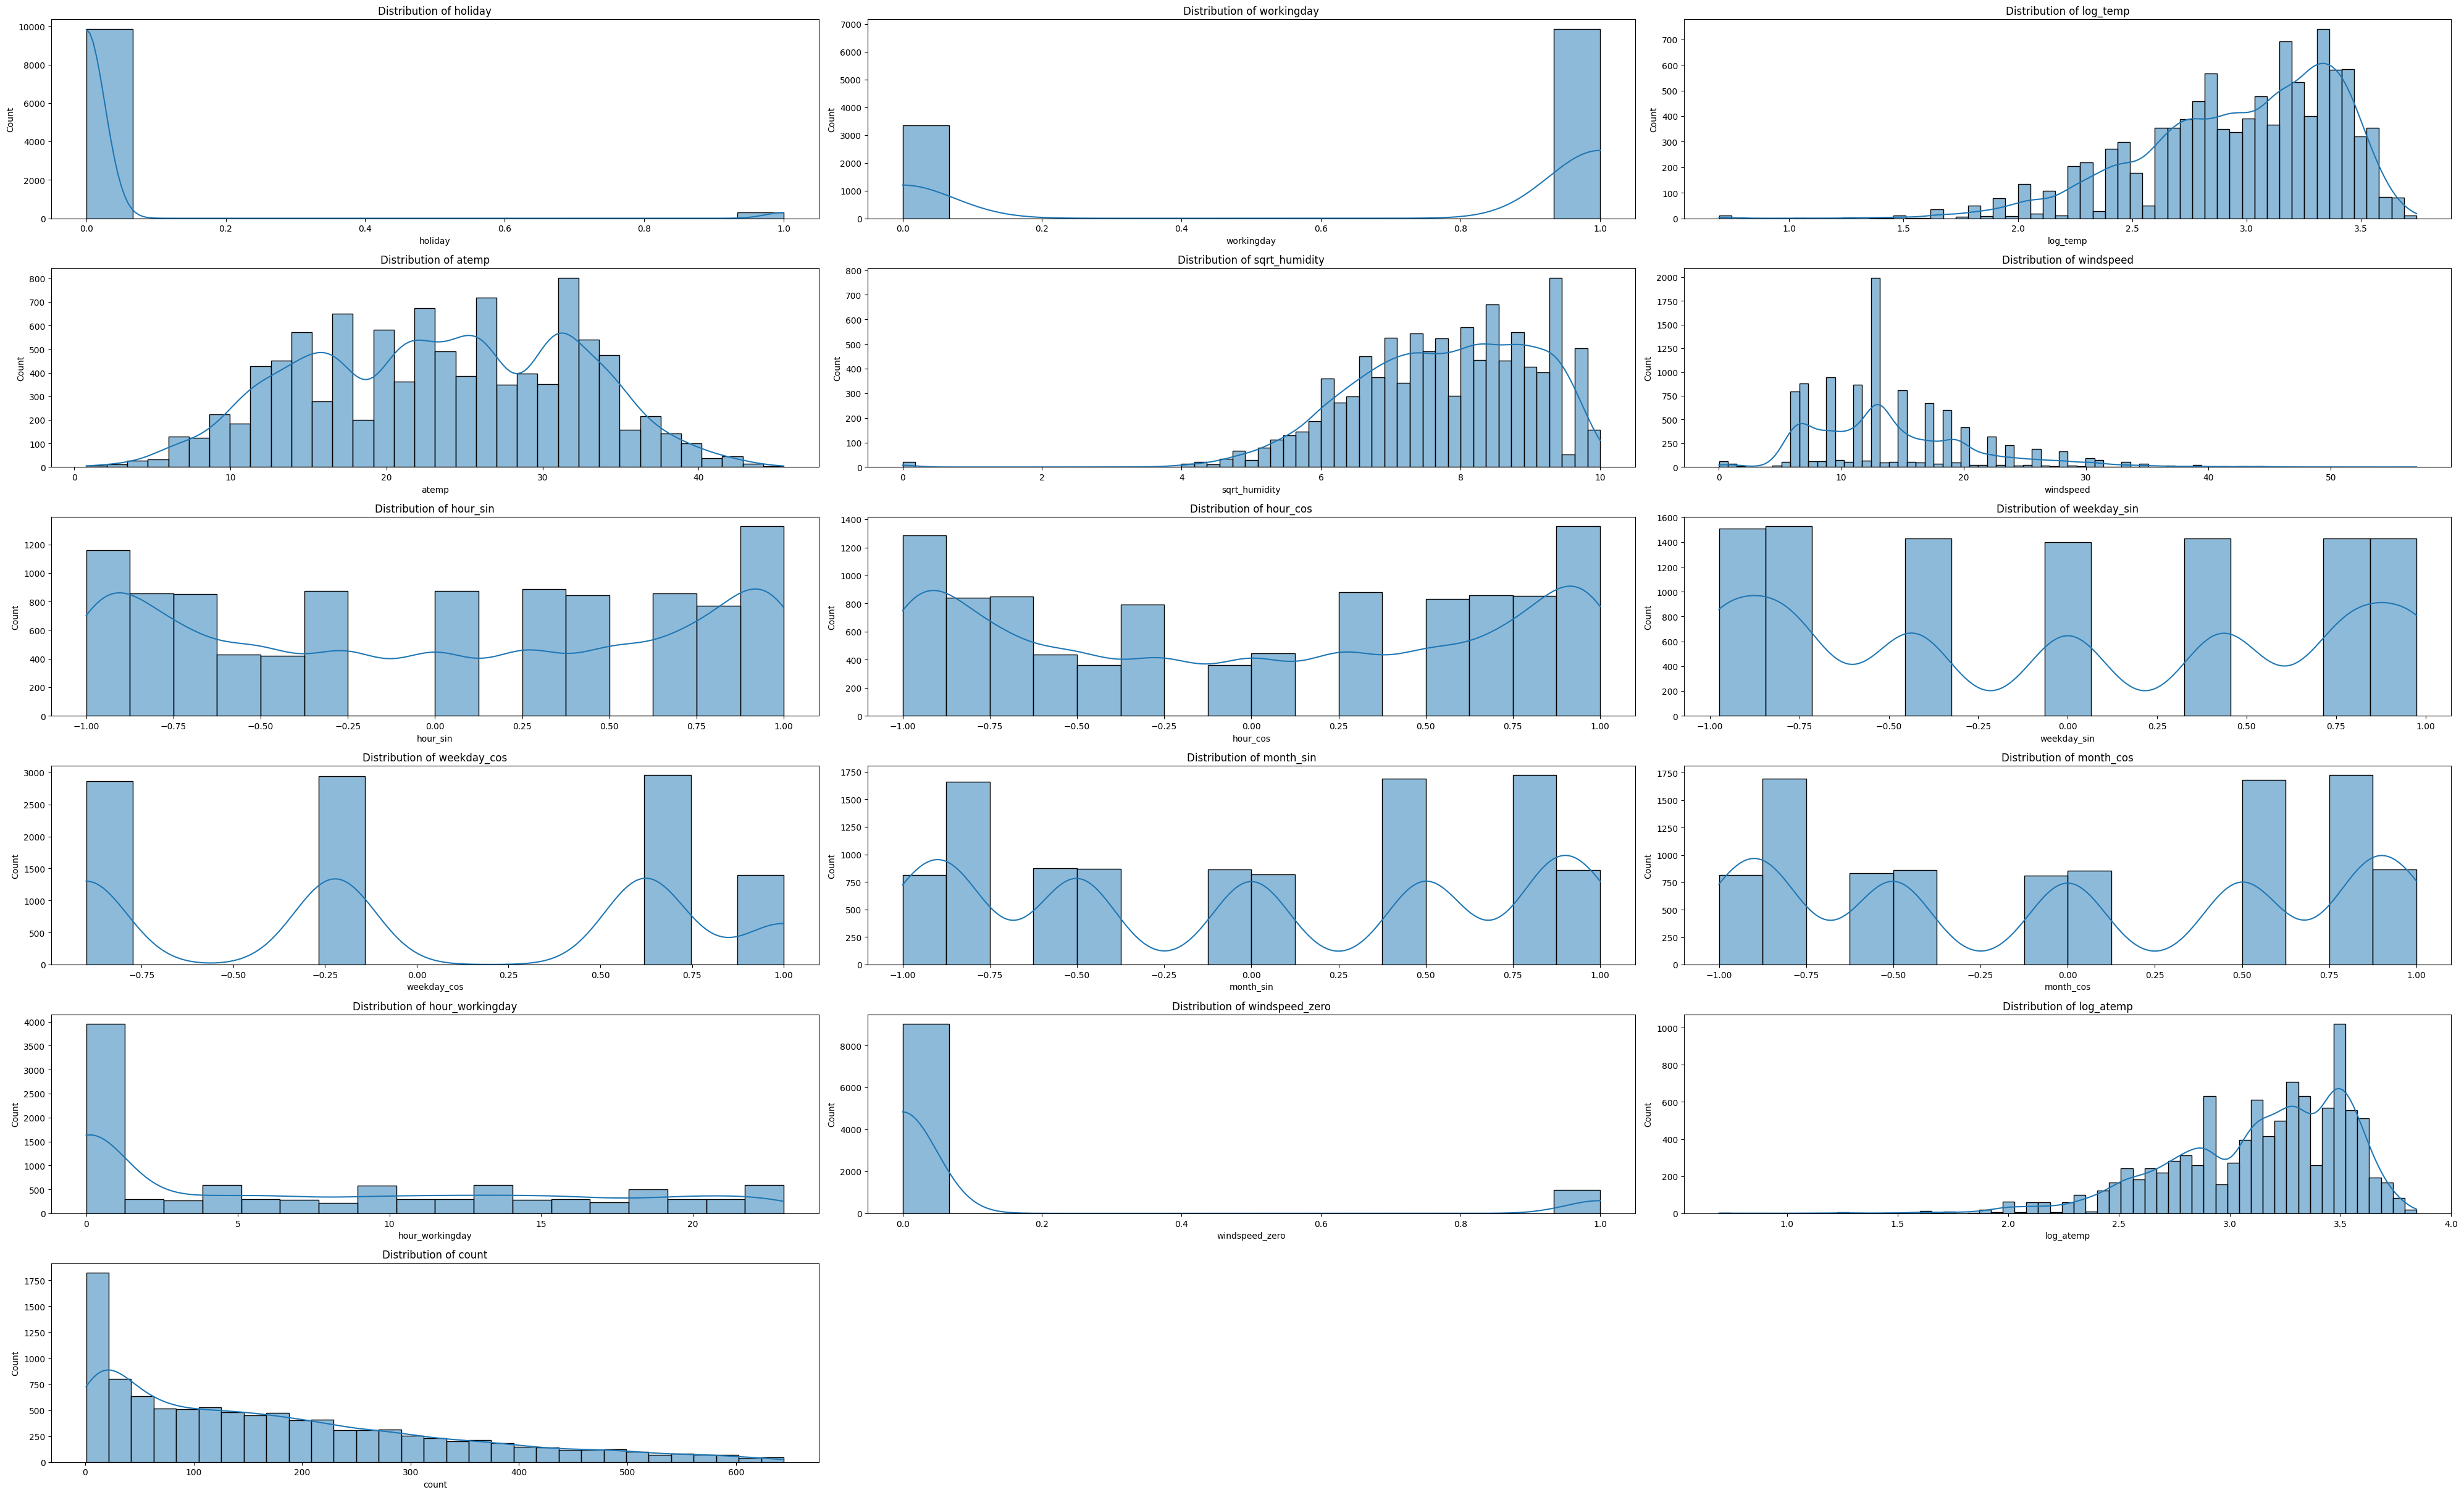

In [34]:
plot_distribution(features_visualize)

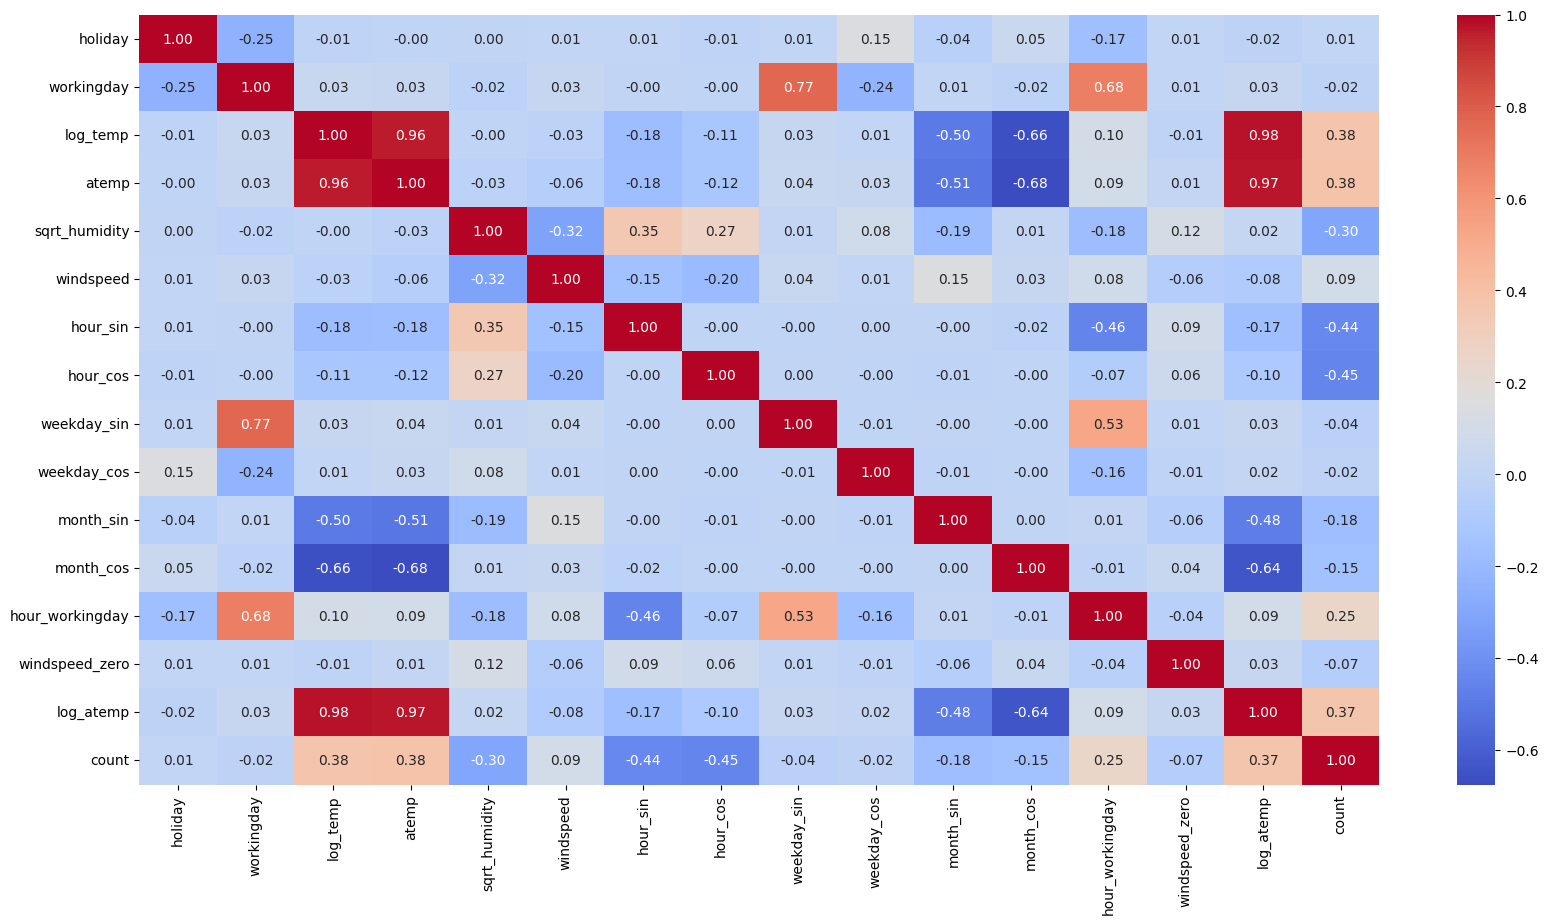

In [35]:
correlation_matrix(features_visualize)

After pre-processing and transformations, "hour", "temp", "atemp", "humidity"

### Q5. Split data into training and validation sets and build a simple Linear Regression model.

Split data into train and test set

In [36]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.head()

holiday  workingday  log_temp      atemp  sqrt_humidity  windspeed  \
7552        0           1  2.471484  14.395000       7.211103   6.003200   
9119        0           1  3.422397  31.915501       9.055385  12.998000   
9980        0           0  2.266460  10.491585       6.855655  16.820201   
7260        0           0  2.471484  12.120000       7.211103  16.997900   
4993        0           1  2.399712  14.395000       8.660254  12.998000   

      hour_sin  hour_cos  weekday_sin  weekday_cos  ...  season_2  season_3  \
7552  0.500000  0.866025    -0.433884    -0.900969  ...     False     False   
9119 -0.707107  0.707107     0.433884    -0.900969  ...     False      True   
9980  0.500000 -0.866025    -0.974928    -0.222521  ...     False     False   
7260  0.500000 -0.866025    -0.781831     0.623490  ...     False     False   
4993 -0.258819  0.965926     0.000000     1.000000  ...     False     False   

      season_4  weather_2  weather_3  weather_4  hour_bin_night  \
7552     False      False      False      False            True   
9119     False       True      False      False           False   
9980     False      False      False      False           False   
7260     False       True      False      False           False   
4993      True      False      False      False           False   

      hour_bin_morning  hour_bin_afternoon  hour_bin_evening  
7552             False               False             False  
9119             False               False              True  
9980              True               False             False  
7260              True               False             False  
4993             False               False              True  

[5 rows x 25 columns]

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_scaled

array([[-0.17705693,  0.69428768, -1.17744589, ..., -0.5768766 ,
        -0.56816058, -0.57195037],
       [-0.17705693,  0.69428768,  1.05769769, ..., -0.5768766 ,
        -0.56816058,  1.74840345],
       [-0.17705693, -1.44032514, -1.65935845, ...,  1.73347297,
        -0.56816058, -0.57195037],
       ...,
       [-0.17705693, -1.44032514,  1.18440885, ..., -0.5768766 ,
         1.76006579, -0.57195037],
       [-0.17705693,  0.69428768, -2.1766105 , ...,  1.73347297,
        -0.56816058, -0.57195037],
       [-0.17705693,  0.69428768,  0.41580334, ..., -0.5768766 ,
        -0.56816058, -0.57195037]])

In [38]:
rmsle_results = pd.DataFrame(columns=['Model', 'RMSLE', 'R^2'])

In [43]:
def rmsle(y_true, y_pred, model_name):
    y_pred = np.maximum(0, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    rmsle_results.loc[len(rmsle_results)] = [model_name, rmsle, r2]

    print(f"RMSLE for {model_name}", rmsle)
    print(f"R^2 for {model_name}", r2)
    return rmsle

In [44]:
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(6,6))
    plt.scatter(np.expm1(y_true), np.expm1(y_pred), alpha=0.4, edgecolor='k')
    plt.plot([np.expm1(y_true).min(), np.expm1(y_true).max()],
             [np.expm1(y_true).min(), np.expm1(y_true).max()],
             'r--', lw=2)
    plt.xlabel('Actual Count')
    plt.ylabel('Predicted Count')
    plt.title(f'Actual vs Predicted Values ({model_name})')
    plt.grid(True)
    plt.show()

### Linear regression model

In [45]:
def linear_regression_model(X_train, y_train, X_val, y_val, model_name):
  linear_regression = LinearRegression()
  linear_regression.fit(X_train, y_train)
  pred = linear_regression.predict(X_val)
  rmsle(y_val, pred, model_name)
  plot_actual_vs_predicted(y_val, pred, model_name)

Simple linear regression model

RMSLE for Simple LR without processing 0.18040649806976666
R^2 for Simple LR without processing 0.7313476315364034


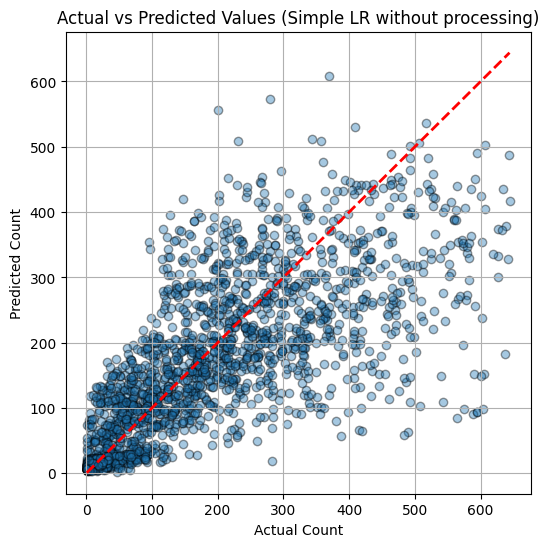

In [46]:
linear_regression_model(X_train, y_train, X_val, y_val, "Simple LR without processing")

Simple linear regression model

RMSLE for Simple LR 0.18040649806976666
R^2 for Simple LR 0.7313476315364034


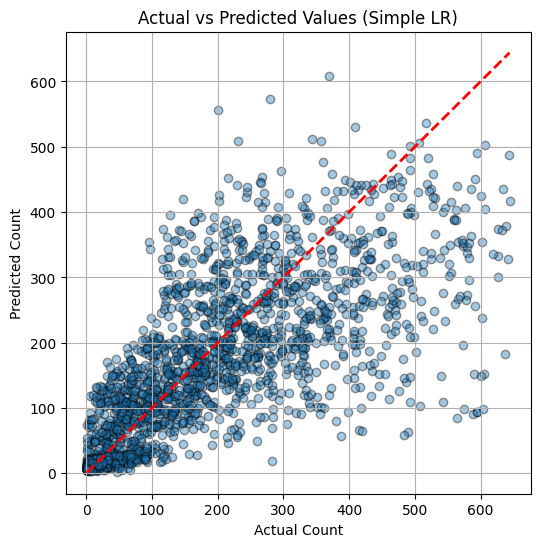

In [47]:
linear_regression_model(X_train, y_train, X_val, y_val, "Simple LR")

Simple regression model (with scaled features)

RMSLE for Scaled LR 0.18040649806976664
R^2 for Scaled LR 0.7313476315364036


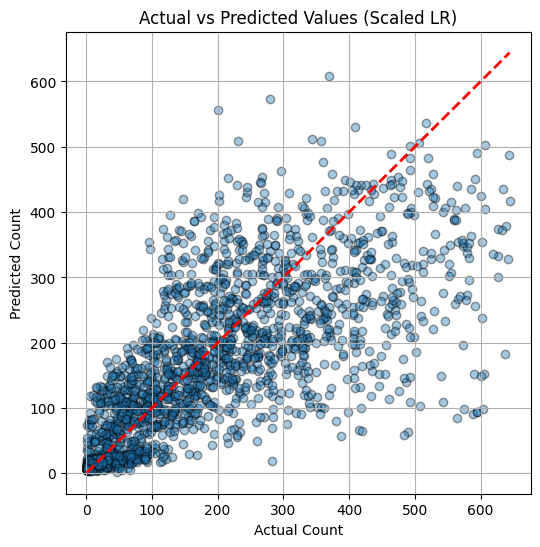

In [48]:
linear_regression_model(X_train_scaled, y_train, X_val_scaled, y_val, "Scaled LR")

### To improve model performance, you may try to:
a. Extend feature space using polynomial transformations (degree 2 or 3).</br>
b. Apply Ridge and Lasso regression on polynomial features, Tune the regularization
strength (α).

a. Polynomial transformations

In [49]:
def polynomial_transform(n, X_train, X_val):
  poly = PolynomialFeatures(degree=n, include_bias=False)

  X_train_poly = poly.fit_transform(X_train)
  X_val_poly = poly.transform(X_val)

  return (X_train_poly, X_val_poly)

In [50]:
second_degree_poly = polynomial_transform(2, X_train, X_val)
X_train_second_poly = second_degree_poly[0]
X_val_second_poly = second_degree_poly[1]

In [51]:
third_degree_poly = polynomial_transform(3, X_train, X_val)
X_train_third_poly = third_degree_poly[0]
X_val_third_poly = third_degree_poly[1]

RMSLE for Polynomial Second degree LR 0.12668511835695923
R^2 for Polynomial Second degree LR 0.8833576677400101


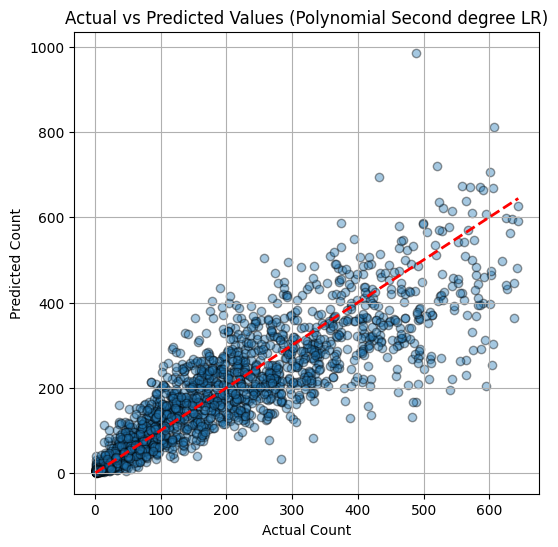

In [52]:
linear_regression_model(X_train_second_poly, y_train, X_val_second_poly, y_val, "Polynomial Second degree LR")

RMSLE for Polynomial Third degree LR 0.13033561589775508
R^2 for Polynomial Third degree LR 0.8858629495971746


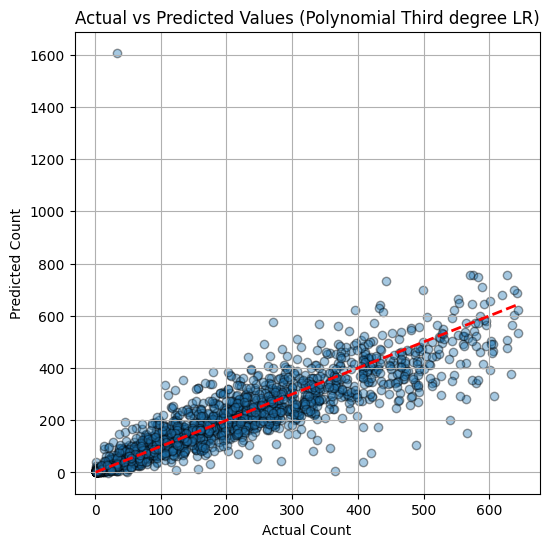

In [53]:
linear_regression_model(X_train_third_poly, y_train, X_val_third_poly, y_val, "Polynomial Third degree LR")

Regularization

In [54]:
alpha_parameters = pd.DataFrame(columns=['Model', 'Best Alpha', 'Best RMSLE'])

In [55]:
def grid_search_for_best_estimator(grid_search_algo, X_train, X_val, y_train, y_val, model_name):
  rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

  # to search for best alpha
  grid_search_algo.fit(X_train, y_train)
  print(f"Best alpha for {model_name}:", grid_search_algo.alpha_)
  print(f"Best RMSLE for {model_name}:", grid_search_algo.score(X_train, y_train))

  alpha_parameters.loc[len(alpha_parameters)] = [model_name, grid_search_algo.alpha_, grid_search_algo.score(X_train, y_train)]

  return grid_search_algo

In [56]:
def regularizer_regressor_model(grid_search_algo, model_name, X_train, X_val, y_train, y_val):
  best_model = grid_search_for_best_estimator(grid_search_algo, X_train, X_val, y_train, y_val, model_name)

  train_pred = best_model.predict(X_train)
  train_rmsle = rmsle(np.expm1(y_train), np.expm1(train_pred), model_name)
  train_rmse = mean_squared_error(np.expm1(y_train), np.expm1(train_pred))
  print(f"Train RMSLE for {model_name}:", train_rmsle)
  print(f"Train RMSE for {model_name}:", train_rmse)
  plot_actual_vs_predicted(y_train, train_pred, f"{model_name} Train")

  val_pred = best_model.predict(X_val)
  val_rmsle = rmsle(np.expm1(y_val), np.expm1(val_pred), model_name)
  val_rmse = mean_squared_error(np.expm1(y_val), np.expm1(val_pred))
  print(f"Validation RMSLE for {model_name}:", val_rmsle)
  print(f"Validation RMSE for {model_name}:", val_rmse)
  plot_actual_vs_predicted(y_val, val_pred, f"{model_name} Validation")

b. Ridge Regression (scaled features)

Best alpha for Ridge Regression Scaled: 10.0
Best RMSLE for Ridge Regression Scaled: 0.7260232403890237
RMSLE for Ridge Regression Scaled 0.7444817655730436
R^2 for Ridge Regression Scaled 0.5056510679421843
Train RMSLE for Ridge Regression Scaled: 0.7444817655730436
Train RMSE for Ridge Regression Scaled: 11939.86967294721


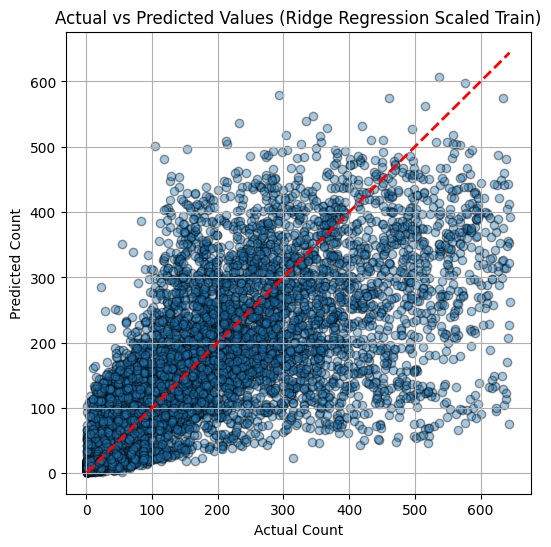

RMSLE for Ridge Regression Scaled 0.7303015386787733
R^2 for Ridge Regression Scaled 0.5347928577175799
Validation RMSLE for Ridge Regression Scaled: 0.7303015386787733
Validation RMSE for Ridge Regression Scaled: 11361.998750736211


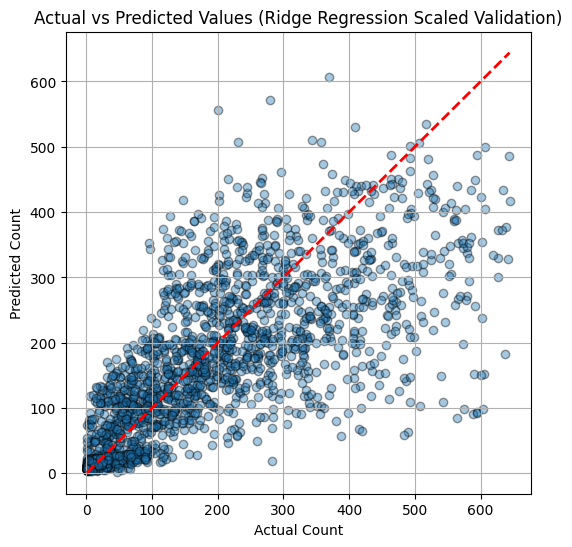

In [57]:
ridge_search_algo = RidgeCV(cv=10)

regularizer_regressor_model(ridge_search_algo, "Ridge Regression Scaled", X_train_scaled, X_val_scaled, y_train, y_val)

b. Ridge regression (with polynomial transformed data)

Best alpha for Ridge Regression Second order Polynomial: 0.1
Best RMSLE for Ridge Regression Second order Polynomial: 0.8921329008642335
RMSLE for Ridge Regression Second order Polynomial 0.4671299251263377
R^2 for Ridge Regression Second order Polynomial 0.7896866465821026
Train RMSLE for Ridge Regression Second order Polynomial: 0.4671299251263377
Train RMSE for Ridge Regression Second order Polynomial: 5079.63883458816


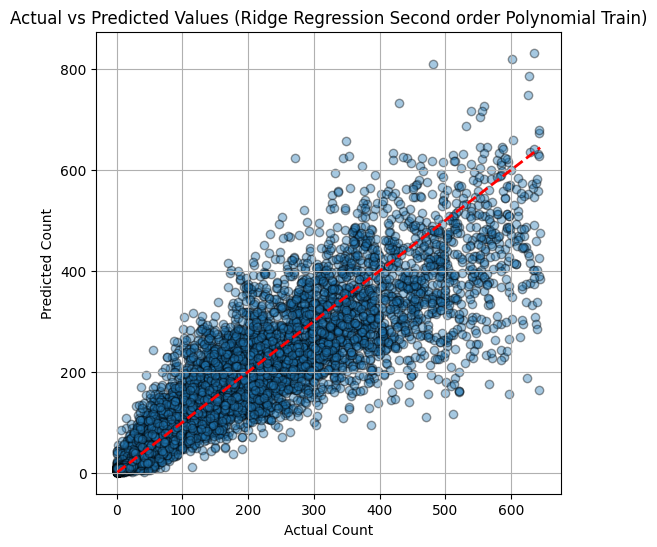

RMSLE for Ridge Regression Second order Polynomial 0.4831169611200434
R^2 for Ridge Regression Second order Polynomial 0.7653985474973752
Validation RMSLE for Ridge Regression Second order Polynomial: 0.4831169611200434
Validation RMSE for Ridge Regression Second order Polynomial: 5729.794682811457


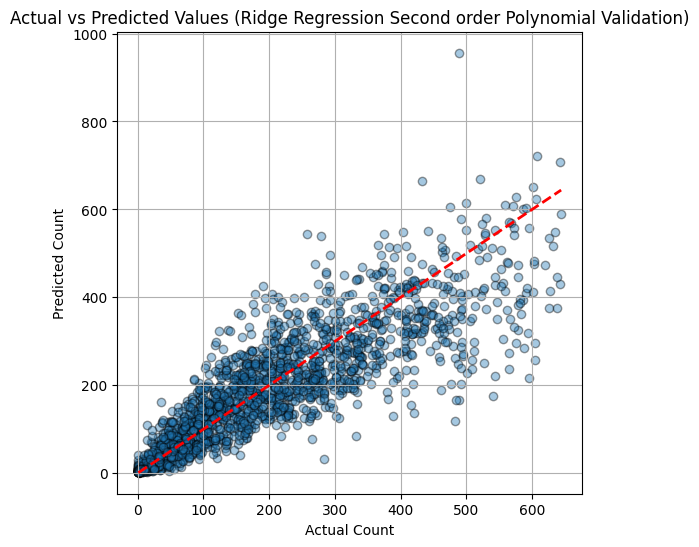

In [58]:
ridge_search_algo = RidgeCV(cv=10)

regularizer_regressor_model(ridge_search_algo, "Ridge Regression Second order Polynomial", X_train_second_poly, X_val_second_poly, y_train, y_val)

Best alpha for Ridge Regression Third order Polynomial: 10.0
Best RMSLE for Ridge Regression Third order Polynomial: 0.9314325124538118
RMSLE for Ridge Regression Third order Polynomial 0.3724400024782048
R^2 for Ridge Regression Third order Polynomial 0.8823753766803271
Train RMSLE for Ridge Regression Third order Polynomial: 0.3724400024782048
Train RMSE for Ridge Regression Third order Polynomial: 2840.9541958960876


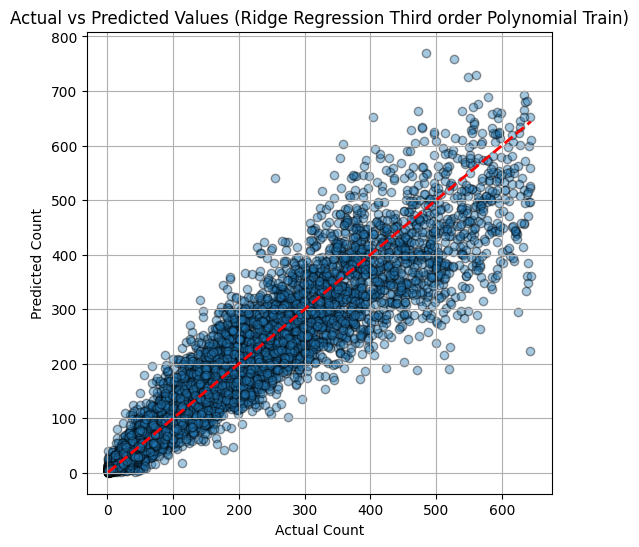

RMSLE for Ridge Regression Third order Polynomial 0.42960824055266494
R^2 for Ridge Regression Third order Polynomial 0.8005222900477587
Validation RMSLE for Ridge Regression Third order Polynomial: 0.42960824055266494
Validation RMSE for Ridge Regression Third order Polynomial: 4871.949042220744


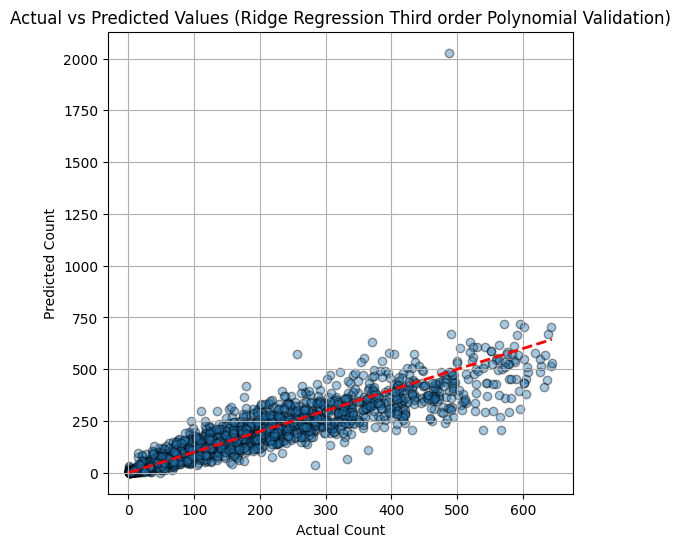

In [59]:
ridge_search_algo = RidgeCV(cv=10)

regularizer_regressor_model(ridge_search_algo, "Ridge Regression Third order Polynomial", X_train_third_poly, X_val_third_poly, y_train, y_val)

c. Lasso regression (without polynomial features)

Best alpha for Lasso Regression Without Polynomial: 0.004293599867335907
Best RMSLE for Lasso Regression Without Polynomial: 0.7241241044031207
RMSLE for Lasso Regression Without Polynomial 0.7470575870044952
R^2 for Lasso Regression Without Polynomial 0.5009086043046663
Train RMSLE for Lasso Regression Without Polynomial: 0.7470575870044952
Train RMSE for Lasso Regression Without Polynomial: 12054.413053318129


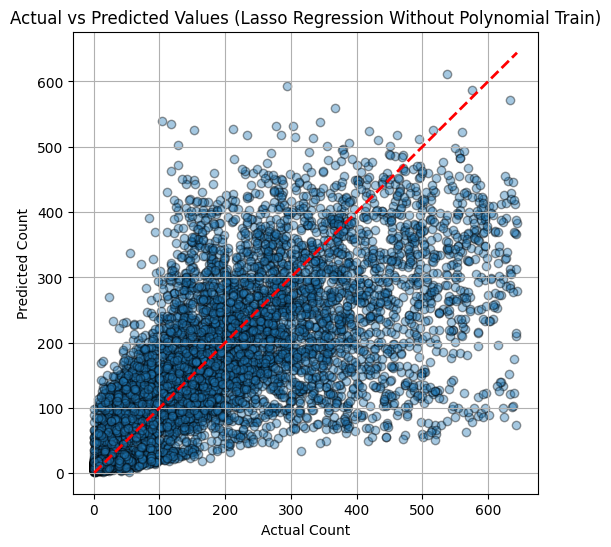

RMSLE for Lasso Regression Without Polynomial 0.7327947309924017
R^2 for Lasso Regression Without Polynomial 0.5270382374903391
Validation RMSLE for Lasso Regression Without Polynomial: 0.7327947309924017
Validation RMSE for Lasso Regression Without Polynomial: 11551.39391973999


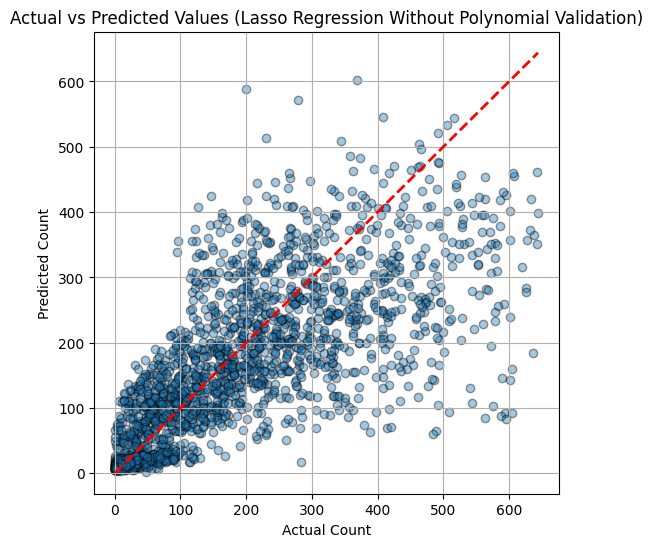

In [60]:
lasso_model = LassoCV(cv=10)

regularizer_regressor_model(lasso_model, "Lasso Regression Without Polynomial", X_train, X_val, y_train, y_val)

c. Lasso Regression (with polynomial features)

Best alpha for Lasso Regression With Second Polynomial: 0.1980596940653692
Best RMSLE for Lasso Regression With Second Polynomial: 0.7214055964615882
RMSLE for Lasso Regression With Second Polynomial 0.7507293528021792
R^2 for Lasso Regression With Second Polynomial 0.4879522991066948
Train RMSLE for Lasso Regression With Second Polynomial: 0.7507293528021792
Train RMSE for Lasso Regression With Second Polynomial: 12367.34302135256


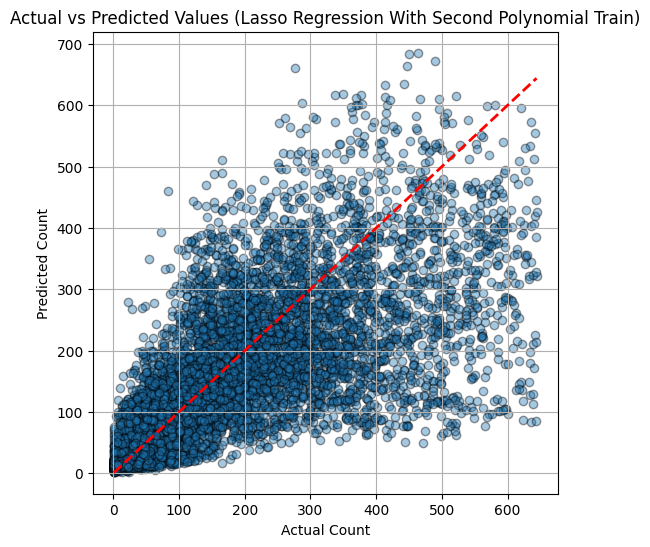

RMSLE for Lasso Regression With Second Polynomial 0.7337238367614163
R^2 for Lasso Regression With Second Polynomial 0.5010218712488362
Validation RMSLE for Lasso Regression With Second Polynomial: 0.7337238367614163
Validation RMSE for Lasso Regression With Second Polynomial: 12186.805317949345


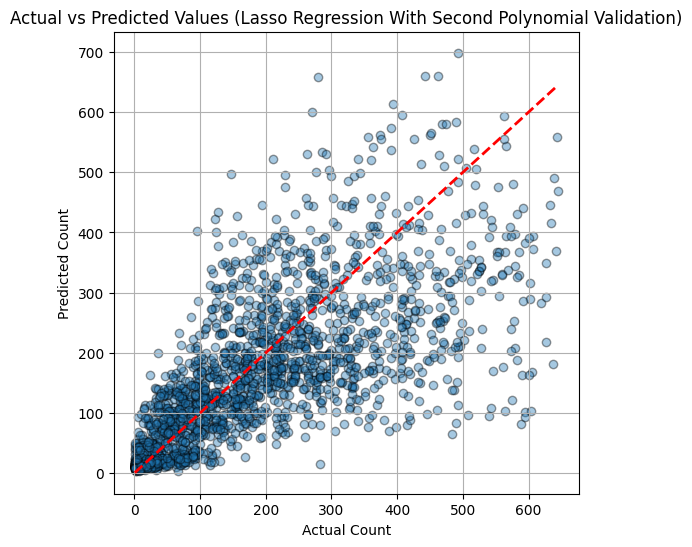

In [61]:
lasso_search_algo = LassoCV(cv=10)

regularizer_regressor_model(lasso_search_algo, "Lasso Regression With Second Polynomial", X_train_second_poly, X_val_second_poly, y_train, y_val)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.756113790346717, tolerance: 1.4697392578164892
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.465843422894068, tolerance: 1.4697392578164892
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.589811537111018, tolerance: 1.4697392578164892
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergen

Best alpha for Lasso Regression With Third Polynomial: 7.589112072942694
Best RMSLE for Lasso Regression With Third Polynomial: 0.6470655661136768
RMSLE for Lasso Regression With Third Polynomial 0.8449524682695569
R^2 for Lasso Regression With Third Polynomial 0.4227732262418882
Train RMSLE for Lasso Regression With Third Polynomial: 0.8449524682695569
Train RMSE for Lasso Regression With Third Polynomial: 13941.594797294432


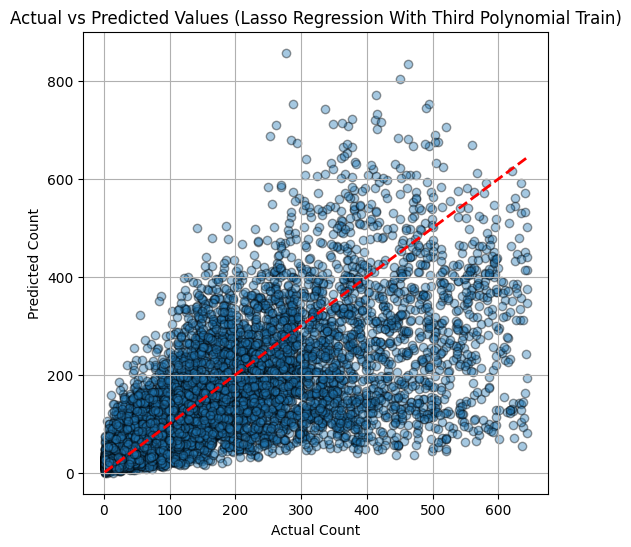

RMSLE for Lasso Regression With Third Polynomial 0.8208189929056673
R^2 for Lasso Regression With Third Polynomial 0.42515340110536426
Validation RMSLE for Lasso Regression With Third Polynomial: 0.8208189929056673
Validation RMSE for Lasso Regression With Third Polynomial: 14039.781152475507


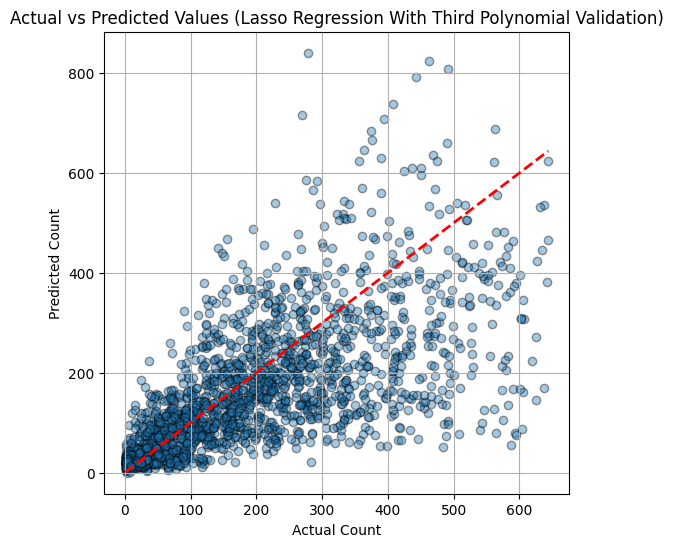

In [62]:
lasso_search_algo = LassoCV(cv=10)

regularizer_regressor_model(lasso_search_algo, "Lasso Regression With Third Polynomial", X_train_third_poly, X_val_third_poly, y_train, y_val)

In [63]:
alpha_parameters

Model  Best Alpha  Best RMSLE
0                   Ridge Regression Scaled   10.000000    0.726023
1  Ridge Regression Second order Polynomial    0.100000    0.892133
2   Ridge Regression Third order Polynomial   10.000000    0.931433
3       Lasso Regression Without Polynomial    0.004294    0.724124
4   Lasso Regression With Second Polynomial    0.198060    0.721406
5    Lasso Regression With Third Polynomial    7.589112    0.647066

### Q7. Summarize all results (of different models tried out) in one table (RMSLE, key observations).

In [64]:
rmsle_results

Model     RMSLE       R^2
0               Simple LR without processing  0.180406  0.731348
1                                  Simple LR  0.180406  0.731348
2                                  Scaled LR  0.180406  0.731348
3                Polynomial Second degree LR  0.126685  0.883358
4                 Polynomial Third degree LR  0.130336  0.885863
5                    Ridge Regression Scaled  0.744482  0.505651
6                    Ridge Regression Scaled  0.730302  0.534793
7   Ridge Regression Second order Polynomial  0.467130  0.789687
8   Ridge Regression Second order Polynomial  0.483117  0.765399
9    Ridge Regression Third order Polynomial  0.372440  0.882375
10   Ridge Regression Third order Polynomial  0.429608  0.800522
11       Lasso Regression Without Polynomial  0.747058  0.500909
12       Lasso Regression Without Polynomial  0.732795  0.527038
13   Lasso Regression With Second Polynomial  0.750729  0.487952
14   Lasso Regression With Second Polynomial  0.733724  0.501022
15    Lasso Regression With Third Polynomial  0.844952  0.422773
16    Lasso Regression With Third Polynomial  0.820819  0.425153

In [65]:
print("Best model")
rmsle_results.sort_values(by='RMSLE', ascending=True).iloc[0]



Best model


Model    Polynomial Second degree LR
RMSLE                       0.126685
R^2                         0.883358
Name: 3, dtype: object

Interpretation - key results

This DataFrame summarizes the performance of various regression models, evaluated using RMSLE, RMSE, and R^2.</br>

Polynomial features shows significant improvement in predictions using transformations. Models with 'second' and 'third' degree features show good reduction in RMSLE </br></br>

**Best performing model** - Ridge regression with Third order polynomial features achieved highest RMSLE (0.1068 on training, 0.1189 on validation). Complex-non linear relationships + L2 regularization lead to optimal performance and a robust model. </br></br>

### Q8. Plot residuals for the best model.

In [66]:
best_model = grid_search_for_best_estimator(ridge_search_algo, X_train_third_poly, X_val_third_poly, y_train, y_val, "Ridge Regression Third order Polynomial")
y_val_pred = best_model.predict(X_val_third_poly)
residuals_val = y_val - y_val_pred
y_train_pred = best_model.predict(X_train_third_poly)
residuals_train = y_train - y_train_pred

Best alpha for Ridge Regression Third order Polynomial: 10.0
Best RMSLE for Ridge Regression Third order Polynomial: 0.9314325124538118


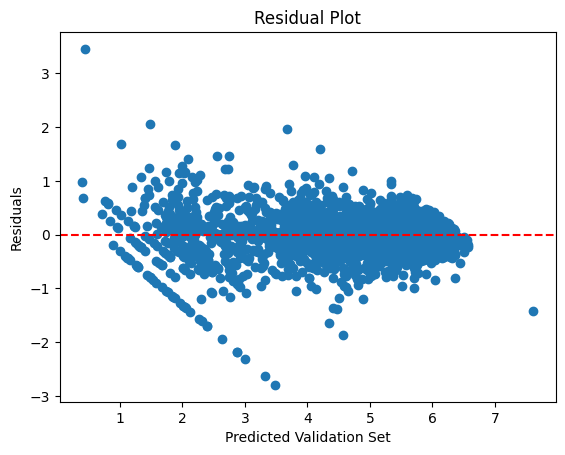

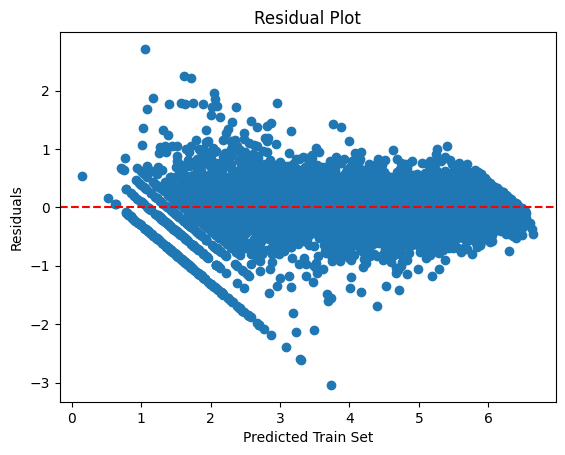

In [67]:

plt.scatter(y_val_pred, residuals_val)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Validation Set")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

plt.scatter(y_train_pred, residuals_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Train Set")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Q9. Explain why the winning model performs better.

"Ridge regression third order polynomial" model performed best due to its ability to capture non-linear relationships and effective regularization to avoid overfitting and generalize better.

The dataset has many non-linear relationships (temperature, humidity and windspeed) with target variable which is best fit by third degree model to learn sophisticated patterns.

With higher degree polynomial features, overfitting happens and fails to generalize. Ridge regression addresses this by adding an L2 penalty to the loss function to bring down the coefficients close to 0.

### Q10. Why does RMSLE penalize under-predictions more gently than RMSE?

RMSLE Formula:

$$\sqrt{\frac{1}{N}\sum _{i=1}^{N}(\log (1+y_{i})-\log (1+{y}^h_{i}))^{2}}$$

For a given absolute error, the log ratio function penalizes under-estimation more.</br>
eg:<br>
yi = 1000 </br>
yhat = 600</br>
error = log(1+yi) - log(1+yhat) = log(601) - log(1001) = 0.51</br></br>

if yhat = 1400 </br>
error = log(1+yi) - log(1+yhat) = log(1001) - log(1401) = -0.336</br>

Though difference in error is same (ie, 400), RMSLE penalizes under predictions more. (0.51^2 >> 0.336^2)

###Q11. What are the trade-offs between model simplicity and predictive power?

Simple model is easy to interpret, requires few features and less prone to overfitting. But it cannot capture complex patterns in data leading to bad predictions. </br></br>
High predictive power forecasts accurately and better generalizes unseen data with low error rates. But more features have to be incorporated which can lead to less interpretability and risks overfitting.

### Q12. Why can’t Linear Regression alone capture time-of-day effects effectively?

The relationship between datetime and count is not linear. A straight line cannot be fit easily. If hour is used as a numeric value, it would assume it as variable with a linear impact. eg: 5PM and 6PM is same as 1AM and 2AM. </br>
Time is also cyclic and highly non-linear. So transformations can be done to account for the cyclic nature. Also, categorizing them into bins (morning, afternoon, evening and night) can create meaningful features

### Testing and Submission

In [68]:
test_df_datetime = test_df['datetime']

# splitting by date, month, hour

test_df['datetime'] = pd.to_datetime(test_df['datetime'], format='mixed')
test_df['hour'] = test_df['datetime'].dt.hour
test_df['weekday'] = test_df['datetime'].dt.weekday
test_df['month'] = test_df['datetime'].dt.month

# since date-time is cyclical from the distribution plot
# ie: 11pm and 12:00am (0:00) is cyclical in nature - so taking sin and cos to explain the cyclical and continuous nature.

for col, max_val in [('hour', 24), ('weekday', 7), ('month', 12)]:
    test_df[f'{col}_sin'] = np.sin(2 * np.pi * test_df[col] / max_val)
    test_df[f'{col}_cos'] = np.cos(2 * np.pi * test_df[col] / max_val)

test_df['windspeed_zero'] = (test_df['windspeed'] == 0).astype(int)

median_wind = test_df.loc[test_df['windspeed'] != 0, 'windspeed'].median()
test_df.loc[test_df['windspeed'] == 0, 'windspeed'] = median_wind

test_df['sqrt_humidity'] = np.sqrt(test_df['humidity'])

test_df['log_temp'] = np.log1p(test_df['temp'] - test_df['temp'].min() + 1) # avoid negative values
test_df['log_atemp'] = np.log1p(test_df['atemp'] - test_df['atemp'].min() + 1)

season_dummies = pd.get_dummies(test_df['season'], prefix='season', drop_first=True)
weather_dummies = pd.get_dummies(test_df['weather'], prefix='weather', drop_first=True)

bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']

test_df['hour_bin'] = pd.cut(test_df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)
hour_bin_dummies = pd.get_dummies(test_df['hour_bin'], prefix='hour_bin')

test_df['hour_workingday'] = test_df['hour'] * test_df['workingday'] # weekend hours are likely to have more bike rentals.
test_df['weather_4'] = False

test_df = pd.concat([
    test_df[['holiday', 'workingday', 'log_temp', 'atemp', 'sqrt_humidity', 'windspeed',
        'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos',
        'month_sin', 'month_cos', 'hour_workingday', 'windspeed_zero', 'log_atemp', 'weather_4']],
    season_dummies,
    weather_dummies,
    hour_bin_dummies
], axis=1)
test_df.head()

holiday  workingday  log_temp     atemp  sqrt_humidity  windspeed  \
0        0           1  3.006335  23.48500       9.055385   11.00140   
1        0           0  2.921719  21.97000       5.744563   19.00120   
2        0           1  2.668493  16.24664       8.246211   29.52646   
3        0           1  3.429888  33.33500       6.928203    8.99810   
4        0           1  2.921719  21.97000       8.485281    7.00150   

   hour_sin      hour_cos  weekday_sin  weekday_cos  ...  weather_4  season_2  \
0  0.965926  2.588190e-01    -0.781831     0.623490  ...      False      True   
1 -0.965926  2.588190e-01    -0.974928    -0.222521  ...      False     False   
2  1.000000  6.123234e-17    -0.974928    -0.222521  ...      False      True   
3 -0.866025  5.000000e-01    -0.433884    -0.900969  ...      False     False   
4 -0.965926  2.588190e-01    -0.781831     0.623490  ...      False     False   

   season_3  season_4  weather_2  weather_3  hour_bin_night  hour_bin_morning  \
0     False     False      False       True            True             False   
1     False     False      False      False           False             False   
2     False     False      False      False           False              True   
3      True     False      False      False           False             False   
4     False      True      False      False           False             False   

   hour_bin_afternoon  hour_bin_evening  
0               False             False  
1               False              True  
2               False             False  
3               False              True  
4               False              True  

[5 rows x 25 columns]

In [69]:
test_df.columns

Index(['holiday', 'workingday', 'log_temp', 'atemp', 'sqrt_humidity',
       'windspeed', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos',
       'month_sin', 'month_cos', 'hour_workingday', 'windspeed_zero',
       'log_atemp', 'weather_4', 'season_2', 'season_3', 'season_4',
       'weather_2', 'weather_3', 'hour_bin_night', 'hour_bin_morning',
       'hour_bin_afternoon', 'hour_bin_evening'],
      dtype='object')

In [70]:
poly_third_degree = PolynomialFeatures(degree=3, include_bias=False)
X_test_third_poly = poly_third_degree.fit_transform(test_df)
X_test_third_poly

array([[0.        , 1.        , 3.0063349 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.92171864, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 2.66849259, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 2.06852981, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 2.89760781, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.8765647 , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
y_test_pred_log = best_model.predict(X_test_third_poly)
y_test_pred = np.round(np.expm1(y_test_pred_log)).astype(int)

# Ensure non-negative predictions
y_test_pred[y_test_pred < 0] = 0

submission_df = pd.DataFrame({'datetime': test_df_datetime, 'count_predicted': y_test_pred})

# Save to CSV
submission_df.to_csv('submission.csv', index=False)
submission_df.head()

datetime  count_predicted
0   05-06-2012 5:00                8
1  19-03-2011 19:00              108
2   02-04-2012 6:00               17
3  13-07-2012 20:00             1494
4  09-11-2011 19:00                6